In [1]:
import xarray as xr
import numpy as np
import time
import matplotlib.pyplot as plt
import os

In [2]:
# to modify based on the data directory
root_directory = os.getcwd().removesuffix('notebooks')
data_path = r'D:/Data/dyes_study/'

In [3]:
import sys
sys.path.append(root_directory + 'scripts/') # go to parent dir
import usefull_functions as uf

%load_ext autoreload
%autoreload 2

# Methods

In [4]:
fig_path = root_directory + 'figures/methods/'
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

In [5]:
nemo_frac = xr.open_dataset(data_path + 'NEMO_water_fractions.nc')

nemo_frac['Patches'] = nemo_frac['dyeLL'] * 1 + nemo_frac['dyeMS'] * 2 + nemo_frac['dyeNP'] * 3 + nemo_frac['dyeHS'] * 4 + nemo_frac['dyeNA'] * 5 + nemo_frac['dyeAA'] * 6
new_nav_lat, new_nav_lon = uf.get_new_nav_lat_lon(data_path); l_depth = nemo_frac['zt'].values

## Dyes definition

C:\Users\bm25v947\AppData\Local\Temp\ipykernel_3348\94007326.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(new_nav_lon, new_nav_lat, nemo_frac['Patches'][0])


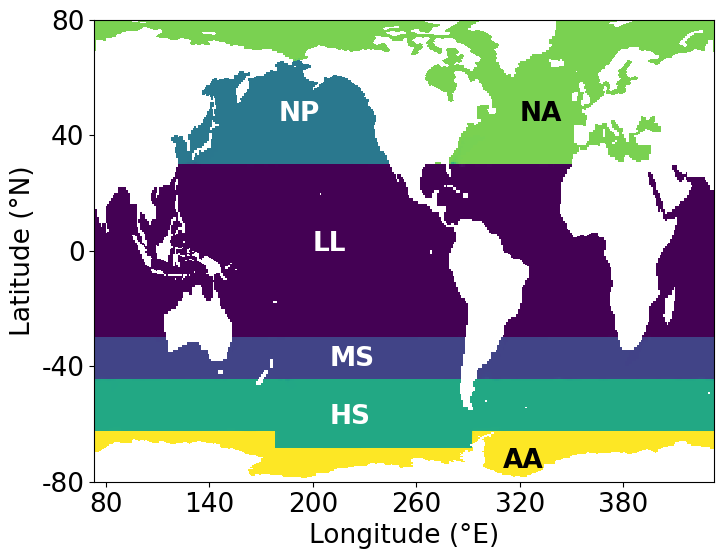

In [11]:
fig = plt.figure(figsize = (8, 6))

ax = plt.gca(); font = 19
pco = ax.pcolormesh(new_nav_lon, new_nav_lat, nemo_frac['Patches'][0])
ax.set_xlim(73.37911, 432.62088); ax.set_xticks([80 + i * 60 for i in range(6)]); ax.set_xticklabels([80 + i * 60 for i in range(6)], fontsize = font)
ax.set_ylim(-80, 80); ax.set_yticks([-80 + 40*i for i in range(5)]); ax.set_yticklabels([-80 + 40*i for i in range(5)], fontsize = font)
ax.set_xlabel('Longitude (°E)', fontsize = font); ax.set_ylabel('Latitude (°N)', fontsize = font)

ax.text(180, 45, 'NP', color = 'white', fontsize = font, fontweight = 'bold')
ax.text(200, 0, 'LL', color = 'white', fontsize = font, fontweight = 'bold')
ax.text(210, -40, 'MS', color = 'white', fontsize = font, fontweight = 'bold')
ax.text(210, -60, 'HS', color = 'white', fontsize = font, fontweight = 'bold')
ax.text(310, -75, 'AA', color = 'black', fontsize = font, fontweight = 'bold')
ax.text(320, 45, 'NA', color = 'black', fontsize = font, fontweight = 'bold')

plt.savefig(fig_path + 'patches_definition.png', bbox_inches = 'tight')

## Isopycnal mixing parameterizations

In [6]:
ah = xr.open_dataset(data_path + 'mixing maps/ahtv_grid_V.nc')
l_depth = ah['depthv'].values

In [7]:
diffusivities = ['ahtv_20', 'ahtv_21', 'ahtv_gr']
label_sims = ['ISOCST', 'REF', 'ISO3D']

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:155: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(nav_lon, nav_lat, array_to_plot[idepth], antialiased = False, norm = norm, cmap = cmapname)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:155: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(nav_lon, nav_lat, array_to_plot[idepth], antialiased = False, norm = norm, cmap = cmapname

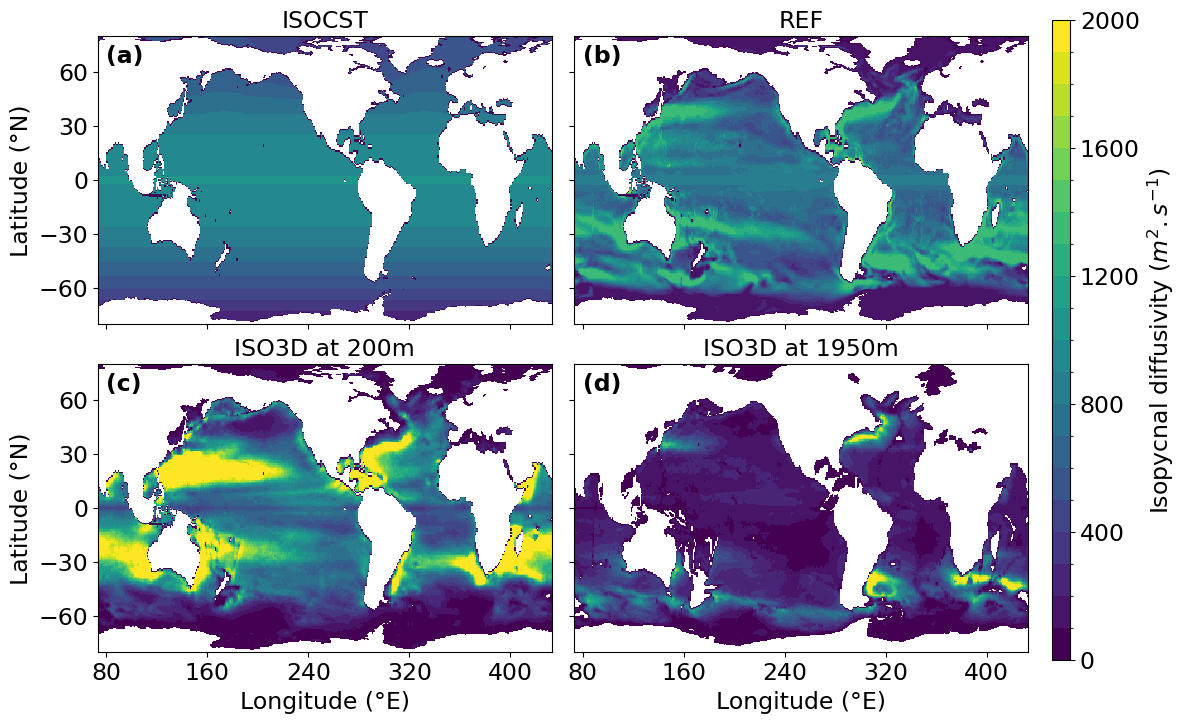

In [8]:
fig = plt.figure(figsize = (12, 8))
gs = fig.add_gridspec(2, 2, wspace=0.05, hspace=0.14); l_i_depth = [30, 53]; l_depth_plot = [200, 1950]
font = 17

for i in range(4):
    i_ligne, i_col = i//2, i%2; ax = fig.add_subplot(gs[i_ligne, i_col])
    xlabels, ylabels = uf.get_xylabels(2, 2, i)
    if i_ligne == 0: 
        r = uf.plot_dye_depthlvl(ax, ah, diffusivities[i_col], new_nav_lat, new_nav_lon, idepth = l_i_depth[i_ligne], vmin = 0, vmax = 2000, nbins = 21, cb = False, ylim = (-80, 80),
                             xticks = [80, 160, 240, 320, 400], yticks = [-60 + i*30 for i in range(5)], fontsize = font, xlabels = xlabels, ylabels = ylabels,)
        ax.set_title(label_sims[i_col], fontsize = font)
    else:
        r = uf.plot_dye_depthlvl(ax, ah, 'ahtv_gr', new_nav_lat, new_nav_lon, idepth = l_i_depth[i_col], vmin = 0, vmax = 2000, nbins = 21, cb = False, ylim = (-80, 80),
                             xticks = [80, 160, 240, 320, 400], yticks = [-60 + i*30 for i in range(5)], fontsize = font, xlabels = xlabels, ylabels = ylabels,)
        ax.set_title('ISO3D' + ' at ' + str(int(l_depth_plot[i_col])) + 'm', fontsize = font)
    
    ax.text(80, 65, uf.panels_letter_parenthesis[i], fontsize = font, fontweight = 'bold')
    if i_ligne == 1: ax.set_xlabel('Longitude (°E)', fontsize = font)
    if ylabels: ax.set_ylabel('Latitude (°N)', fontsize = font)

uf.add_cbar(fig, r, fontsize = font, label = 'Isopycnal diffusivity ($m^2.s^{-1}$)', ticks = [400*i for i in range(6)])
# plt.savefig(fig_path + 'isopycnal_diffusion_maps_.png', bbox_inches = 'tight')

## Justification of the validity of the extrapolation

In [6]:
transient_nemo_frac = xr.open_dataset(data_path + 'NEMOref_transient_dyes.nc')

In [7]:
years_nemo = transient_nemo_frac['years'].values

In [8]:
i_years_100 = [0, 10, 20]
for i in range(58):
    i_years_100.append(i + 30)

In [10]:
mask_SZ = (new_nav_lat <= 60) & (new_nav_lat >= 30) & (new_nav_lon <= 240) & (new_nav_lon >= 150)
mask_SZ_3D = np.tile(mask_SZ, (75, 1, 1))
print(l_depth[50:60]) # the depth index to be taken for the nanmean

[1516.36364746 1652.56848145 1795.67077637 1945.29553223 2101.02661133
 2262.42163086 2429.02514648 2600.38037109 2776.03930664 2955.5703125 ]


In [28]:
aux = transient_nemo_frac[[var for var in transient_nemo_frac.data_vars if 'dye' in var]].isel(Time = i_years_100[11], Depth = slice(50, 60))

In [29]:
np.nanmean(aux['dyeAA'].where(mask_SZ_3D[50:60]))

np.float64(0.08740438996516947)

In [34]:
l_sum_dyes = []; l_age = []
array_dyes_filled_PSZ = np.zeros((61, 6))

for i in range(61):
    aux = transient_nemo_frac[[var for var in transient_nemo_frac.data_vars if 'dye' in var]].isel(Time = i_years_100[i], Depth = slice(50, 60))
    l_age.append(i * 100)#; l_age_SZ.append(np.nanmean(np.where(mask_SZ_3D, aux['Age'], np.nan)[50:60]))
    for j, dye in enumerate(uf.l_patches2):
        array_dyes_filled_PSZ[i, j] = aux['dye' + dye].where(mask_SZ_3D[50:60]).mean(dim = ('Depth', 'Longitude', 'Latitude'), skipna = True)
    l_sum_dyes.append(np.nansum(array_dyes_filled_PSZ[i]))
    if i % 10 == 0:
        print('Year ' + str(i * 100) + ' done')

Year 0 done
Year 1000 done
Year 2000 done
Year 3000 done
Year 4000 done
Year 5000 done
Year 6000 done


In [ ]:
dsClim = xr.open_dataset(data_path + "basin_masks.nc")
n_x, n_y = 360, 331

mask_NEMO_Pac = uf.optimized_mask_Pac_creation(new_nav_lat, new_nav_lon, n_x, n_y, dsClim['lat'].values, dsClim['lon'].values, dsClim['basin_masks'].values)
lats_avg = uf.get_lats_avg(new_nav_lat, mask_NEMO_Pac)

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)


In [38]:
array_sum_dyes = np.nansum(array_dyes_filled_PSZ, axis = 1)

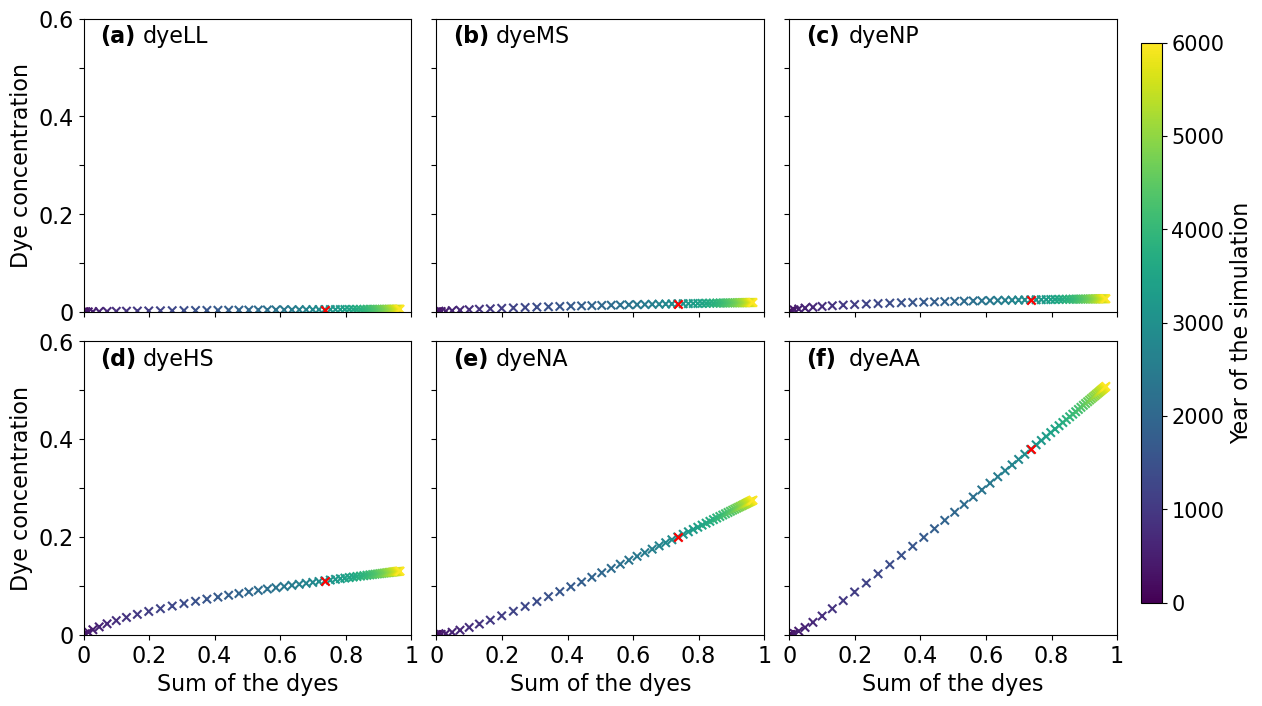

In [39]:
fig = plt.figure(figsize = (14, 8)); font = 16
gs = fig.add_gridspec(2, 4, width_ratios = [1, 1, 1, 0.08], hspace = 0.1, wspace = 0.1)
for i in range(6):
    ax = fig.add_subplot(gs[i//3, i%3]); xlabels, ylabels = uf.get_xylabels(2, 3, i)
    sc = ax.scatter(array_sum_dyes, array_dyes_filled_PSZ[:, i], marker = 'x', c = l_age)
    ax.scatter(array_sum_dyes[l_age.index(3000)], array_dyes_filled_PSZ[l_age.index(3000), i], color= 'red', marker = 'x')
    uf.plot_details_axis(ax, sc, cb = False, xlim = (0, 1), ylim = (0, 0.6), font = font, xlabels = xlabels, ylabels = ylabels, 
                          xticks = [0.2 * i for i in range(6)], yticks = [0.1 * i for i in range(7)])
    if ylabels: ax.set_yticklabels(['0', '', '0.2', '', '0.4', '', '0.6'], fontsize = font); ax.set_ylabel('Dye concentration', fontsize = font)
    ax.text(0.05, 0.55, uf.panels_letter_parenthesis[i], fontsize = font, fontweight = 'bold'); ax.text(0.18, 0.55, uf.dyes[i], fontsize = font)
    if xlabels: ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'], fontsize = font); ax.set_xlabel('Sum of the dyes', fontsize = font)

uf.add_cbar(fig, sc, fontsize = font, x = 0.88, height = 0.7, y = 0.15, label = 'Year of the simulation')

plt.savefig(fig_path + 'timeseries_dyes_equilibrium_REF.png', bbox_inches = 'tight')

# Comparison between NEMO and inverse models

In [4]:
fig_path = root_directory + 'figures/comparison 3 models/'
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

In [ ]:
dsClim = xr.open_dataset(data_path + "basin_masks.nc")
l_lat_clim = dsClim['lat'].values; l_lon_clim = dsClim['lon'].values; l_depth0 = uf.create_l_depth()
mask_clim = dsClim['basin_masks'].values

In [6]:
nemo_frac = xr.open_dataset(data_path + 'NEMO_water_fractions.nc')
l_depth = nemo_frac['zt'].values
new_nav_lat, new_nav_lon = uf.get_new_nav_lat_lon(data_path); n_y, n_x = np.shape(new_nav_lat)

In [7]:
TMI_2deg = xr.open_dataset(data_path + 'TMI_2deg_2010_water_mass_fractions.nc')
l_lat_TMI, l_lon_TMI = TMI_2deg['yt'].values.copy(), TMI_2deg['xt'].values.copy(); l_depth_TMI = TMI_2deg['zt'].values
l_lon_TMI3D, l_lat_TMI3D = np.meshgrid(l_lon_TMI, l_lat_TMI)

In [8]:
ocim_frac = xr.open_dataset(data_path + 'OCIM2-48L_water_fractions.nc')
l_lat_ocim, l_lon_ocim, l_depth_ocim = ocim_frac['yt'].values, ocim_frac['xt'].values, ocim_frac['zt'].values
l_lon_ocim3D, l_lat_ocim3D = np.meshgrid(l_lon_ocim, l_lat_ocim)

## Steady-state comparison

In [9]:
mask_NEMO_Pac, mask_NEMO_Atl = uf.optimized_mask_Pac_creation(new_nav_lat, new_nav_lon, n_x, n_y, dsClim['lat'].values, dsClim['lon'].values, dsClim['basin_masks'].values), uf.optimized_mask_Atl_creation(new_nav_lat, new_nav_lon, n_x, n_y, dsClim['lat'].values, dsClim['lon'].values, dsClim['basin_masks'].values)
mask_ocim_Pac, mask_ocim_Atl = uf.optimized_mask_Pac_creation(l_lat_ocim3D, l_lon_ocim3D, 180, 91, l_lat_clim, l_lon_clim, mask_clim),  uf.optimized_mask_Atl_creation(l_lat_ocim3D, l_lon_ocim3D, 180, 91, l_lat_clim, l_lon_clim, mask_clim)
mask_TMI_Pac, mask_TMI_Atl = uf.optimized_mask_Pac_creation(l_lat_TMI3D, l_lon_TMI3D, 180, 90, l_lat_clim, l_lon_clim, mask_clim, clim = True), uf.optimized_mask_Atl_creation(l_lat_TMI3D, l_lon_TMI3D, 180, 90, l_lat_clim, l_lon_clim, mask_clim, clim = True)

In [10]:
lats_avg = uf.get_lats_avg(new_nav_lat, mask_NEMO_Pac)

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)


### Volumes

In [11]:
last_depth_TMI = np.count_nonzero(~np.isnan(TMI_2deg['dyeAA']), axis = 0) - 1; depths = np.array(l_depth_TMI)
depth_grid_TMI = np.where(~np.isnan(TMI_2deg['dyeAA'][0]), depths[last_depth_TMI], np.nan)

volume_depth_TMI = uf.vol_depth_TMI(TMI_2deg)

In [12]:
vol_NEMO = [np.multiply(nemo_frac['dye' + patch].values, nemo_frac['dVt']) for patch in uf.l_patches2]
vol_summed_NEMO = np.nansum(vol_NEMO, axis = (1, 2, 3))# ; vol_summed_reshaped_NEMO = [vol_summed_NEMO[5], vol_summed_NEMO[3], vol_summed_NEMO[2], vol_summed_NEMO[4], vol_summed_NEMO[1] + vol_summed_NEMO[0]]

vol_ocim = [np.multiply(ocim_frac['dVt'].values, ocim_frac['dye' + patch].values) for patch in uf.l_patches2]
vol_summed_ocim = np.nansum(vol_ocim, axis = (1, 2, 3))

vol_TMI = [np.multiply(TMI_2deg['dye' + patch], volume_depth_TMI) for patch in uf.l_patches2]
vol_summed_TMI = np.nansum(vol_TMI, axis = (1, 2, 3))

In [13]:
ratio_correctif_ocim = np.nansum(vol_summed_NEMO)/np.nansum(vol_summed_ocim)
ratio_correctif_TMI = np.nansum(vol_summed_NEMO)/np.nansum(vol_summed_TMI)

vol_summed_ocim_corrected = [vol_summed_ocim[i] * ratio_correctif_ocim for i in range(6)]
vol_summed_TMI_corrected = [vol_summed_TMI[i] * ratio_correctif_TMI for i in range(6)]

In [14]:
vol_ocim_Pac = [np.multiply(ocim_frac['dVt'].values, np.where(mask_ocim_Pac, ocim_frac['dye' + patch].values, np.nan)) for patch in uf.l_patches2]
vol_summed_ocim_Pac = np.nansum(vol_ocim_Pac, axis = (1, 2, 3))

vol_NEMO_Pac = [np.multiply(np.where(mask_NEMO_Pac, nemo_frac['dye' + patch].values, np.nan), nemo_frac['dVt']) for patch in uf.l_patches2]
vol_summed_NEMO_Pac = np.nansum(vol_NEMO_Pac, axis = (1, 2, 3))# ; vol_summed_reshaped_NEMO_Pac = [vol_summed_NEMO_Pac[-1], vol_summed_NEMO_Pac[3], vol_summed_NEMO_Pac[2], vol_summed_NEMO_Pac[4], vol_summed_NEMO_Pac[1] + vol_summed_NEMO_Pac[0]]

vol_TMI_Pac = [np.multiply(np.where(mask_TMI_Pac, TMI_2deg['dye' + patch], np.nan), volume_depth_TMI) for patch in uf.l_patches2]
vol_summed_TMI_Pac = np.nansum(vol_TMI_Pac, axis = (1, 2, 3))# ; vol_summed_reshaped_TMI_Pac = [vol_summed_TMI_Pac[5], vol_summed_TMI_Pac[3], vol_summed_TMI_Pac[2], vol_summed_TMI_Pac[4], vol_summed_TMI_Pac[1] + vol_summed_TMI_Pac[0]]

In [15]:
ratio_correctif_ocim_Pac = np.nansum(vol_summed_NEMO_Pac)/np.nansum(vol_summed_ocim_Pac)
ratio_correctif_TMI_Pac = np.nansum(vol_summed_NEMO_Pac)/np.nansum(vol_summed_TMI_Pac)

vol_summed_ocim_Pac_corrected = [vol_summed_ocim_Pac[i] * ratio_correctif_ocim_Pac for i in range(6)]
vol_summed_TMI_Pac_corrected = [vol_summed_TMI_Pac[i] * ratio_correctif_TMI_Pac for i in range(6)]

In [16]:
vol_ocim_Atl = [np.multiply(ocim_frac['dVt'].values, np.where(mask_ocim_Atl, ocim_frac['dye' + patch].values, np.nan)) for patch in uf.l_patches2]
vol_summed_ocim_Atl = np.nansum(vol_ocim_Atl, axis = (1, 2, 3))

vol_NEMO_Atl = [np.multiply(np.where(mask_NEMO_Atl, nemo_frac['dye' + patch].values, np.nan), nemo_frac['dVt']) for patch in uf.l_patches2]
vol_summed_NEMO_Atl = np.nansum(vol_NEMO_Atl, axis = (1, 2, 3))# ; vol_summed_reshaped_NEMO_Atl = [vol_summed_NEMO_Atl[-1], vol_summed_NEMO_Atl[3], vol_summed_NEMO_Atl[2], vol_summed_NEMO_Atl[4], vol_summed_NEMO_Atl[1] + vol_summed_NEMO_Atl[0]]

vol_TMI_Atl = [np.multiply(np.where(mask_TMI_Atl, TMI_2deg['dye' + patch], np.nan), volume_depth_TMI) for patch in uf.l_patches2]
vol_summed_TMI_Atl = np.nansum(vol_TMI_Atl, axis = (1, 2, 3))# ; vol_summed_reshaped_TMI_Atl = [vol_summed_TMI_Atl[5], vol_summed_TMI_Atl[3], vol_summed_TMI_Atl[2], vol_summed_TMI_Atl[4], vol_summed_TMI_Atl[1] + vol_summed_TMI_Atl[0]]

In [17]:
ratio_correctif_ocim_Atl = np.nansum(vol_summed_NEMO_Atl)/np.nansum(vol_summed_ocim_Atl)
ratio_correctif_TMI_Atl = np.nansum(vol_summed_NEMO_Atl)/np.nansum(vol_summed_TMI_Atl)

vol_summed_ocim_Atl_corrected = [vol_summed_ocim_Atl[i] * ratio_correctif_ocim_Atl for i in range(6)]
vol_summed_TMI_Atl_corrected = [vol_summed_TMI_Atl[i] * ratio_correctif_TMI_Atl for i in range(6)]

In [18]:
sum_vol_NEMO = np.nansum(vol_summed_NEMO)
sum_vol_NEMO_Pac = np.nansum(vol_summed_NEMO_Pac)
sum_vol_NEMO_Atl = np.nansum(vol_summed_NEMO_Atl)

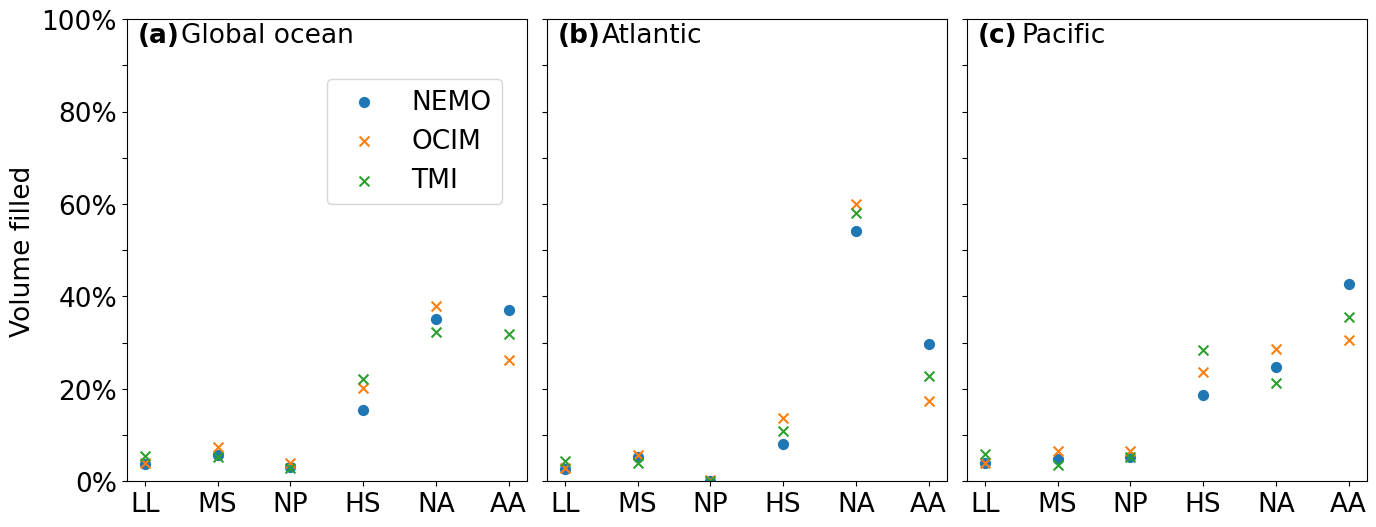

In [19]:
fig = plt.figure(figsize = (16, 6))
gs = fig.add_gridspec(1, 3, wspace=0.05, hspace=0.14); font = 19; alpha = 1; size = 50

ax = fig.add_subplot(gs[0, 0])

ax.scatter(range(6), vol_summed_NEMO/sum_vol_NEMO, marker = 'o', label = 'NEMO', alpha = alpha, s = size)
ax.scatter(range(6), vol_summed_ocim_corrected/sum_vol_NEMO, marker = 'x', label = 'OCIM', alpha = alpha, s = size)
ax.scatter(range(6), vol_summed_TMI_corrected/sum_vol_NEMO, marker = 'x', label = 'TMI', alpha = alpha, s = size)
ax.set_ylim(0, 1); ax.set_ylabel('Volume filled', fontsize = font)
ax.set_xticks([0, 1, 2, 3, 4, 5]); ax.set_xticklabels(uf.l_patches2, fontsize = font)
ax.set_yticks([i*0.1 for i in range(11)]); ax.set_yticklabels(['0%', '', '20%', '', '40%', '', '60%', '', '80%', '', '100%'], fontsize = font)
ax.text(0.5, 0.95, 'Global ocean', fontsize = font); ax.text(-0.1, 0.95, '(' + uf.panels_letter[0] + ')', fontsize = font, fontweight = 'bold')
legend = plt.legend(loc = (0.5, 0.6), fontsize = font, frameon=True)
legend.get_frame()  # 0 is fully transparent, 1 is fully opaque

ax = fig.add_subplot(gs[0, 1])
ax.scatter(range(6), vol_summed_NEMO_Atl/sum_vol_NEMO_Atl, marker = 'o', label = 'NEMO', alpha = alpha, s = size)
ax.scatter(range(6), vol_summed_ocim_Atl_corrected/sum_vol_NEMO_Atl, marker = 'x', label = 'OCIM', alpha = alpha, s = size)
ax.scatter(range(6), vol_summed_TMI_Atl_corrected/sum_vol_NEMO_Atl, marker = 'x', label = 'TMI', alpha = alpha, s = size)
ax.set_ylim(0, 1)
ax.set_xticks([0, 1, 2, 3, 4, 5]); ax.set_xticklabels(uf.l_patches2, fontsize = font)
ax.set_yticks([i*0.1 for i in range(11)]); ax.set_yticklabels([])
ax.text(0.5, 0.95, 'Atlantic', fontsize = font); ax.text(-0.1, 0.95, '(' + uf.panels_letter[1] + ')', fontsize = font, fontweight = 'bold')

ax = fig.add_subplot(gs[0, 2])
ax.scatter(range(6), vol_summed_NEMO_Pac/sum_vol_NEMO_Pac, marker = 'o', label = 'NEMO', alpha = alpha, s = size)
ax.scatter(range(6), vol_summed_ocim_Pac_corrected/sum_vol_NEMO_Pac, marker = 'x', label = 'OCIM', alpha = alpha, s = size)
ax.scatter(range(6), vol_summed_TMI_Pac_corrected/sum_vol_NEMO_Pac, marker = 'x', label = 'TMI', alpha = alpha, s = size)
ax.set_ylim(0, 1)
ax.set_xticks([0, 1, 2, 3, 4, 5]); ax.set_xticklabels(uf.l_patches2, fontsize = font)
ax.set_yticks([i*0.1 for i in range(11)]); ax.set_yticklabels([], fontsize = font)
ax.text(0.5, 0.95, 'Pacific', fontsize = font); ax.text(-0.1, 0.95, '(' + uf.panels_letter[2] + ')', fontsize = font, fontweight = 'bold')

plt.savefig(fig_path + 'volume_summed_ocim_vs_TMI_tm21ah21_Atl_Pac_globalOcean.png', bbox_inches = 'tight')

### Dyes distribution

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:120: RuntimeWarning: Mean of empty slice
  array_to_plot = np.nanmean(np.where(np.tile(mask, (len(list(l_depth)), 1, 1)), ds_averaged[field], np.nan), axis=2)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:120: RuntimeWarning: Mean of empty slice
  array_to_plot = np.nanmean(np.where(np.tile(mask, (len(list(l_depth)), 1, 1)), ds_averaged[field], np.nan), axis=2)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lat

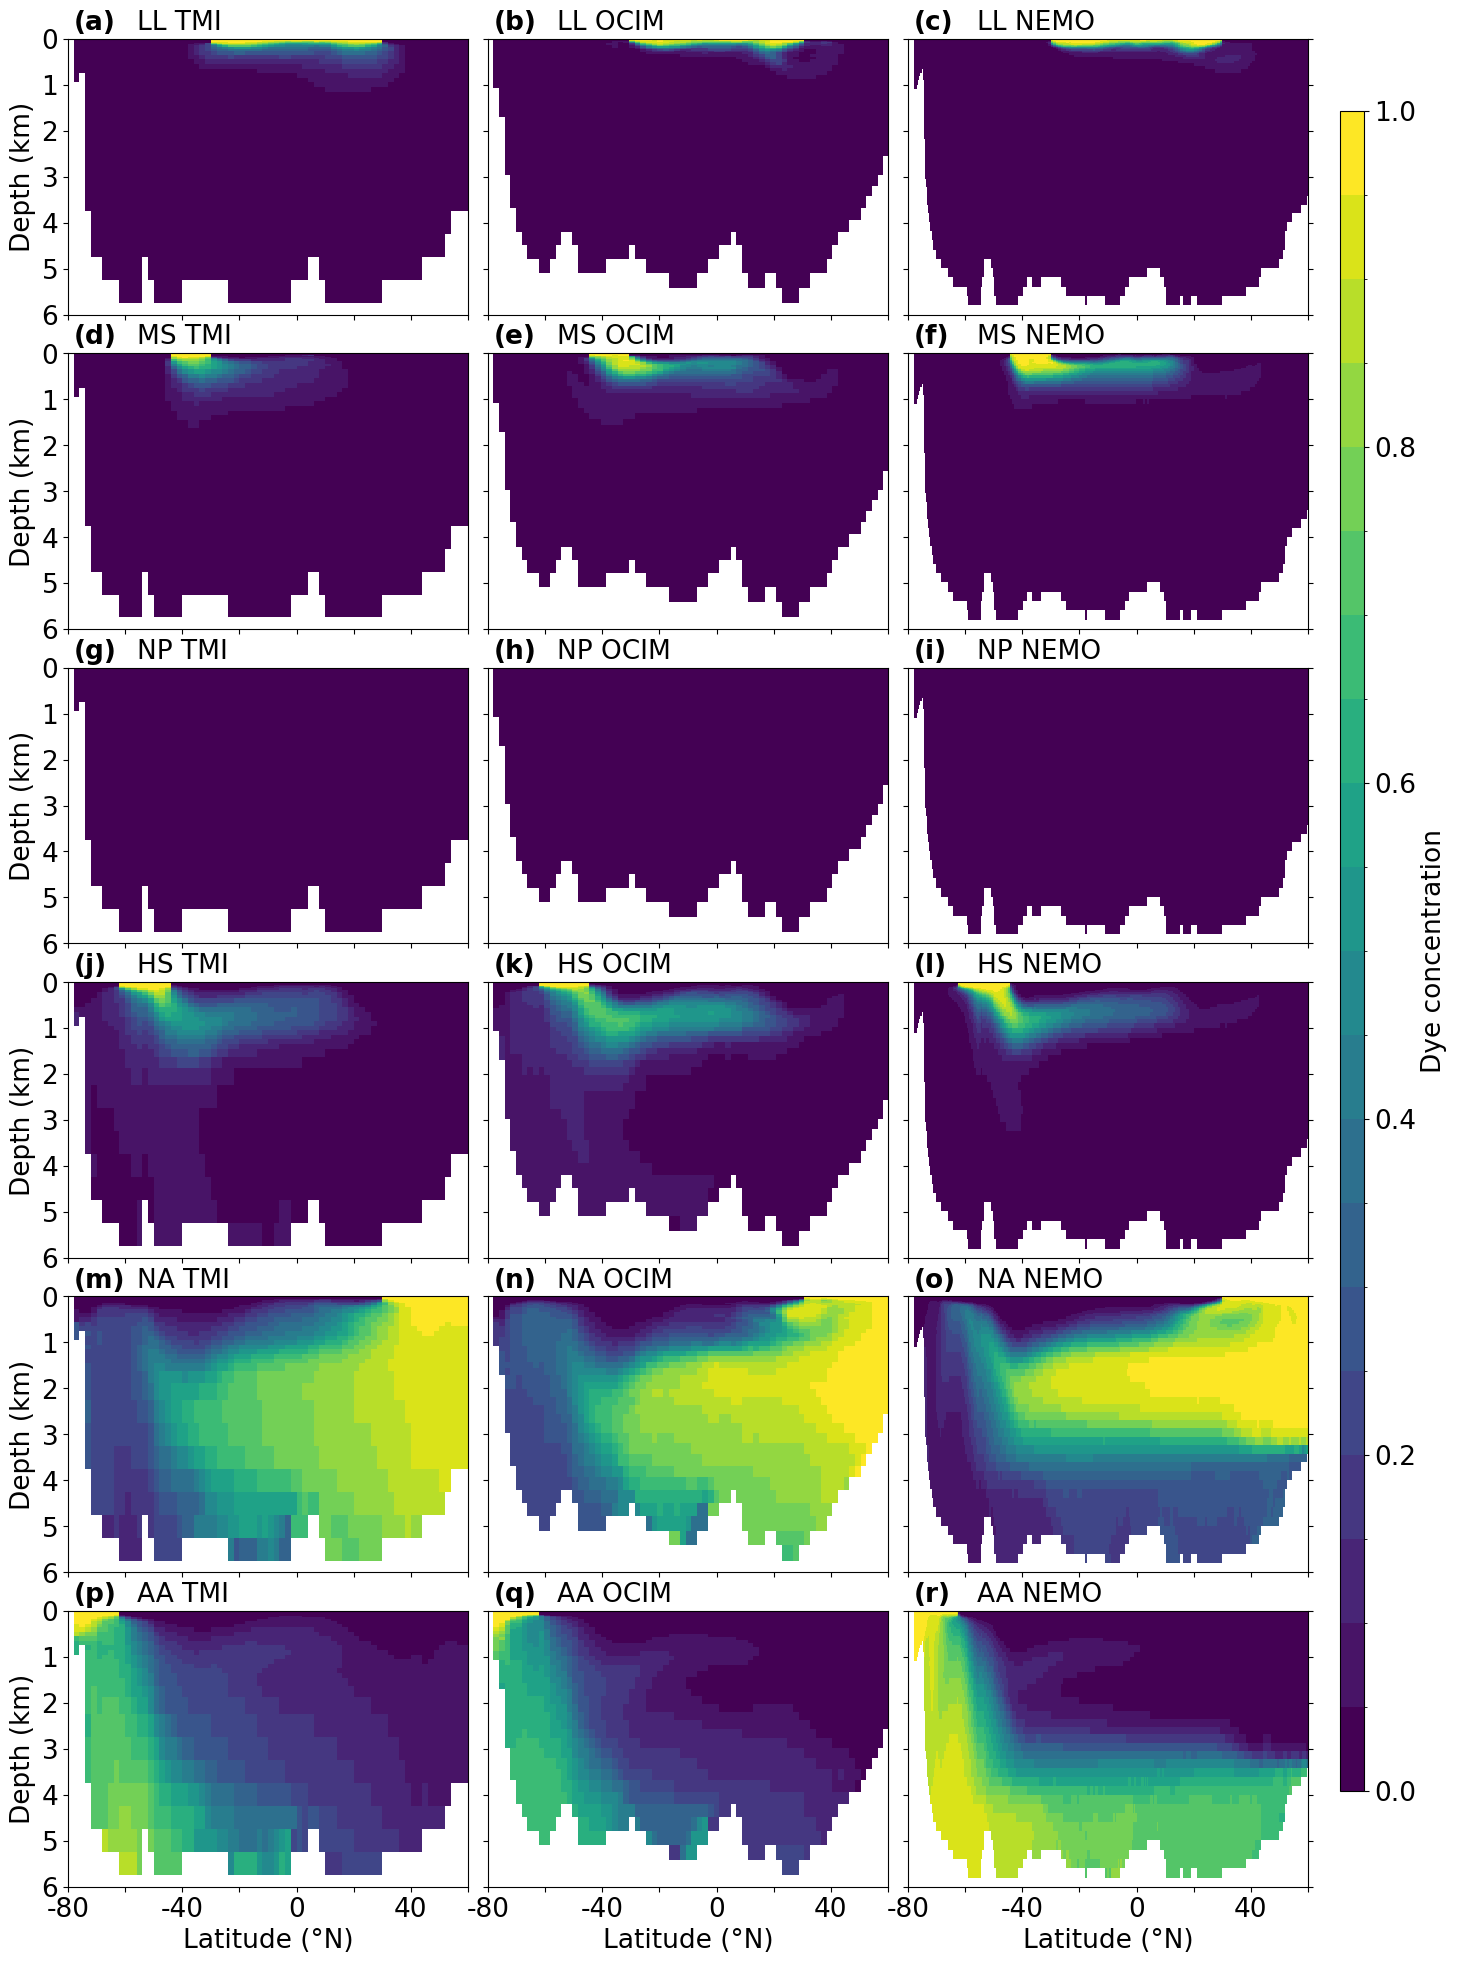

In [20]:
fig = plt.figure(figsize = (16, 24))
gs = fig.add_gridspec(6, 3, wspace=0.05, hspace=0.14); font = 19
#changez l'ordre des lignes/colonnes
for region in uf.l_patches2:
    iregion = uf.l_patches2.index(region); ax1 = fig.add_subplot(gs[iregion, 0]); ax2 = fig.add_subplot(gs[iregion, 2]); ax3 = fig.add_subplot(gs[iregion, 1])
    xlabels = False
    if iregion == 5:
        xlabels = True
    uf.plot_Pac_mean(ax3, ocim_frac, 'dye' + region, l_depth_ocim, mask_ocim_Atl, l_lat_ocim3D, cb = False, nbins = 20, xlabels = xlabels, ylabels = False, font = font,  
                        xlim = (-80, 60), xticks = [-80 + i * 20 for i in range(8)])
    ax3.text(-78, -200, '(' + uf.panels_letter[iregion * 3 + 1] + ')', fontsize = font, fontweight = 'bold'); ax3.text(-56, -200, region + ' OCIM', fontsize = font)
    uf.plot_Pac_mean(ax1, TMI_2deg, 'dye' + region, l_depth_TMI, mask_TMI_Atl, l_lat_TMI3D, cb = False, nbins = 20, xlabels = xlabels, ylabels = True, font = font,  
                        xlim = (-80, 60), xticks = [-80 + i * 20 for i in range(8)])
    ax1.text(-78, -200, '(' + uf.panels_letter[iregion * 3] + ')', fontsize = font, fontweight = 'bold'); ax1.text(-56, -200, region + ' TMI', fontsize = font)
    pco = uf.plot_Pac_mean(ax2, nemo_frac, 'dye' + region, l_depth, mask_NEMO_Atl, new_nav_lat, cb = False, nbins = 20, xlabels = xlabels, ylabels = False, font = font,  
                        xlim = (-80, 60), xticks = [-80 + i * 20 for i in range(8)])
    ax2.text(-78, -200, '(' + uf.panels_letter[iregion * 3 + 2] + ')', fontsize = font, fontweight = 'bold'); ax2.text(-56, -200, region + ' NEMO', fontsize = font)
    if iregion == 5: 
        for ax in [ax1, ax2, ax3]: ax.set_xticklabels(['-80', '', '-40', '', '0', '', '40', '']); ax.set_xlabel('Latitude (°N)', fontsize = font)
    ax2.tick_params(axis='y', which='both', left=True, right=True)
    
uf.add_cbar(fig, pco[0], x = 0.92, fontsize = font, label = 'Dye concentration', ticks = [0.2*i for i in range(6)], y = .15, height = 0.7, width = 0.015)
plt.savefig(fig_path + 'dyes_Atlantic_ocim_vs_TMI_NEMO.png', bbox_inches = 'tight')

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:120: RuntimeWarning: Mean of empty slice
  array_to_plot = np.nanmean(np.where(np.tile(mask, (len(list(l_depth)), 1, 1)), ds_averaged[field], np.nan), axis=2)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:120: RuntimeWarning: Mean of empty slice
  array_to_plot = np.nanmean(np.where(np.tile(mask, (len(list(l_depth)), 1, 1)), ds_averaged[field], np.nan), axis=2)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lat

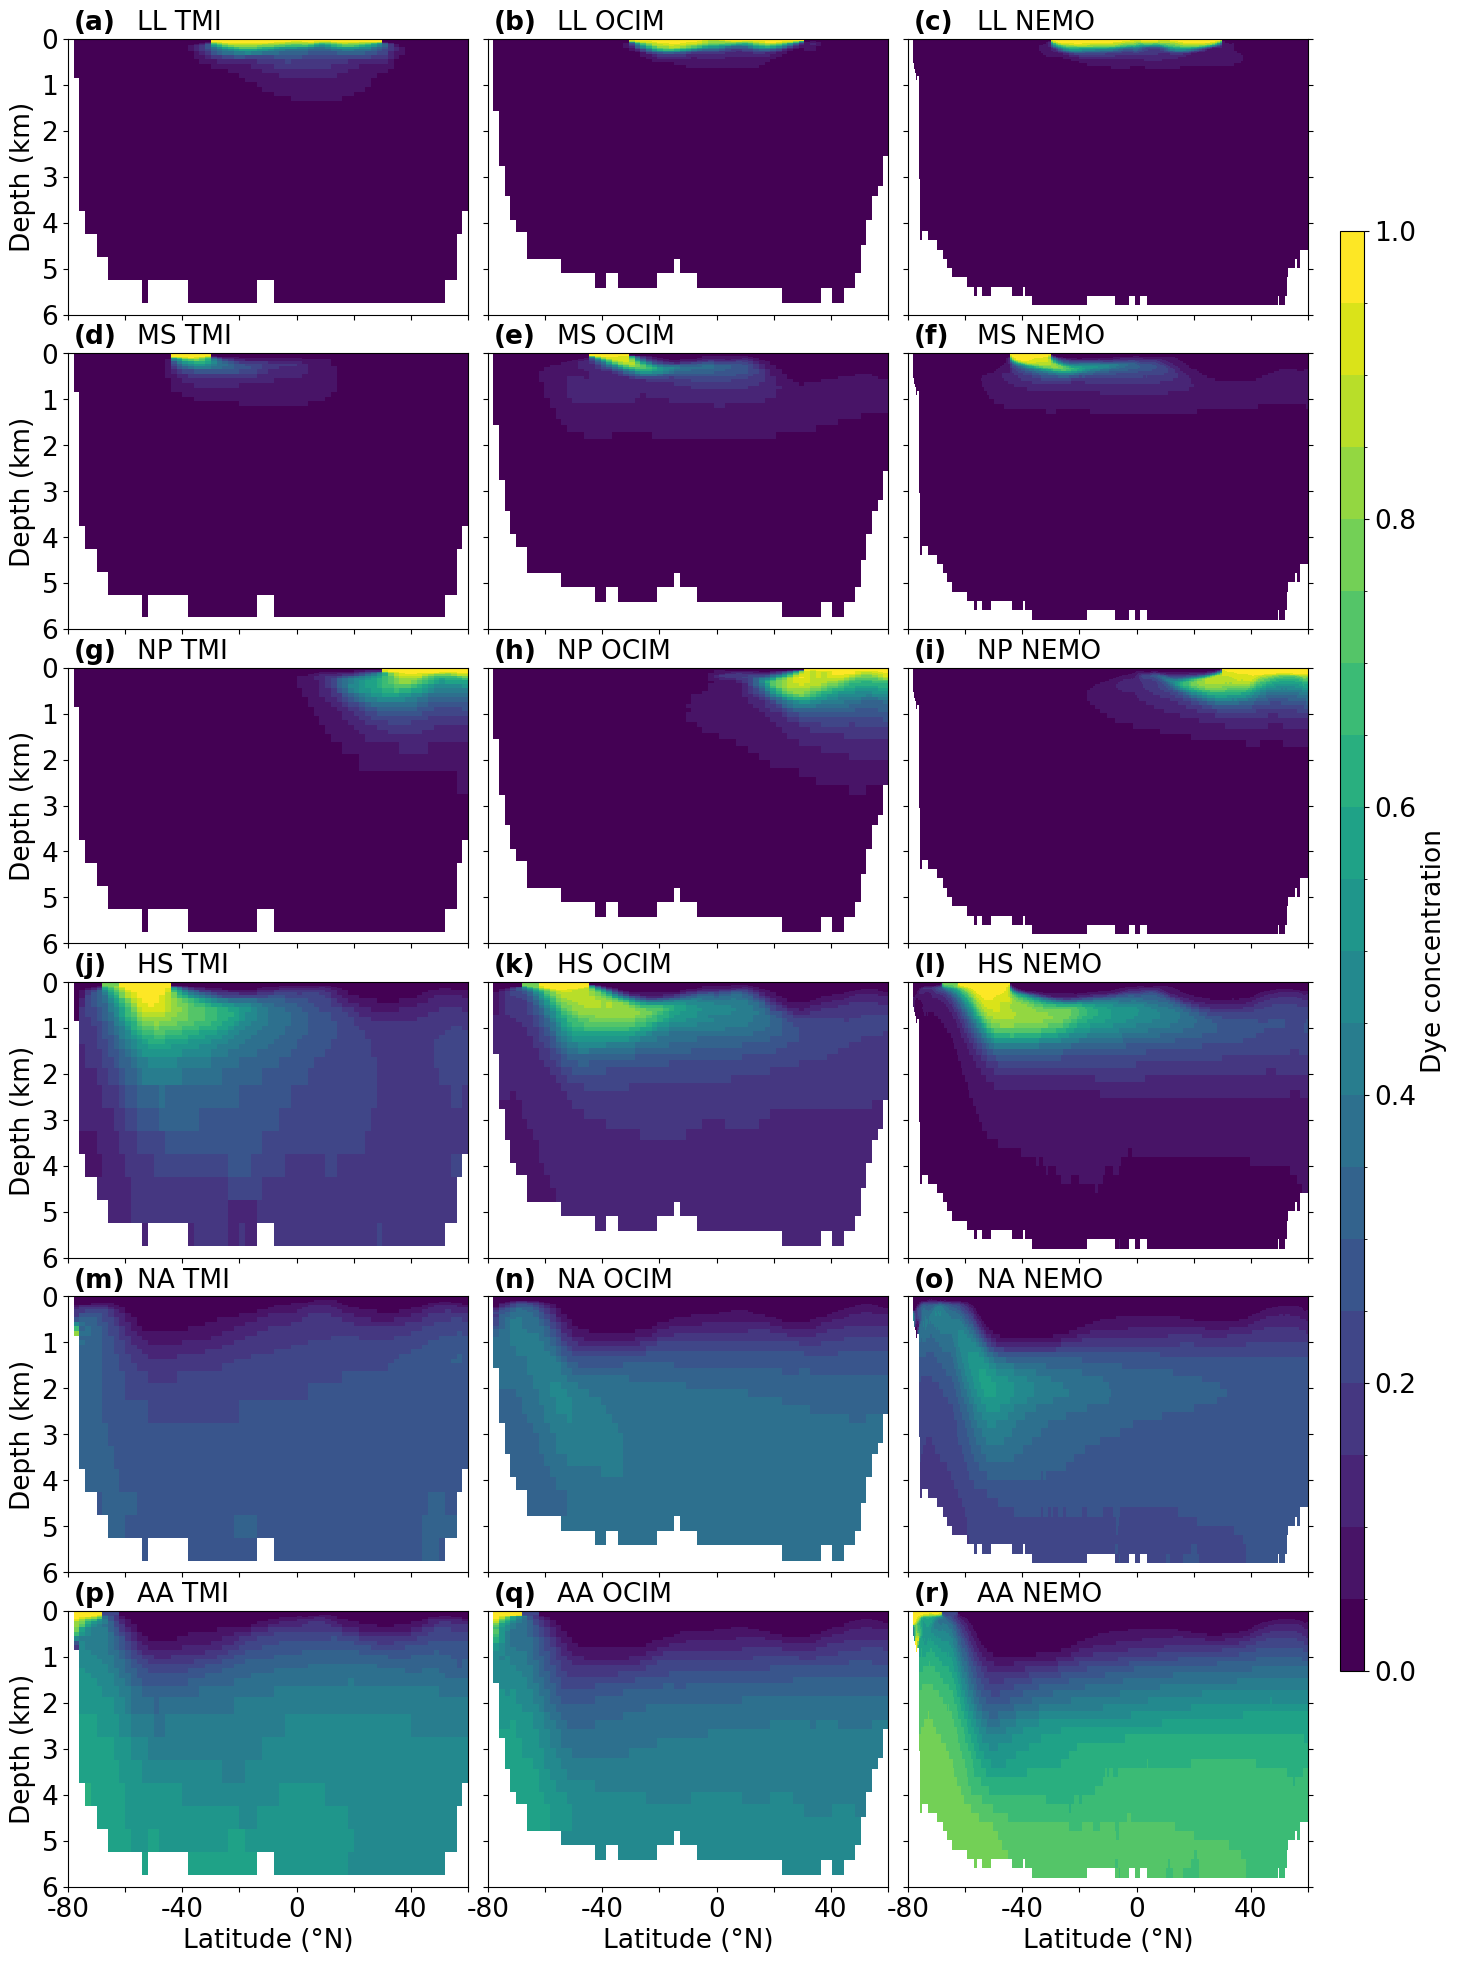

In [21]:
fig = plt.figure(figsize = (16, 24))
gs = fig.add_gridspec(6, 3, wspace=0.05, hspace=0.14); font = 19
labels_patches = ['AA', 'HS', 'NP', 'NA', 'LL']
#changez l'ordre des lignes/colonnes
for region in uf.l_patches2:
    iregion = uf.l_patches2.index(region); ax1 = fig.add_subplot(gs[iregion, 1]); ax2 = fig.add_subplot(gs[iregion, 2]); ax3 = fig.add_subplot(gs[iregion, 0])
    xlabels = False
    if iregion == 5:
        xlabels = True
    uf.plot_Pac_mean(ax1, ocim_frac, 'dye' + region, l_depth_ocim, mask_ocim_Pac, l_lat_ocim3D, cb = False, nbins = 20, xlabels = xlabels, ylabels = False, font = font,  
                        xlim = (-80, 60), xticks = [-80 + i * 20 for i in range(8)])
    ax1.text(-78, -200, '(' + uf.panels_letter[iregion * 3 + 1] + ')', fontsize = font, fontweight = 'bold'); ax1.text(-56, -200, region + ' OCIM', fontsize = font)
    uf.plot_Pac_mean(ax3, TMI_2deg, 'dye' + region, l_depth_TMI, mask_TMI_Pac, l_lat_TMI3D, cb = False, nbins = 20, xlabels = xlabels, ylabels = True, font = font,  
                        xlim = (-80, 60), xticks = [-80 + i * 20 for i in range(8)])
    ax3.text(-78, -200, '(' + uf.panels_letter[iregion * 3] + ')', fontsize = font, fontweight = 'bold'); ax3.text(-56, -200, region + ' TMI', fontsize = font)
    pco = uf.plot_Pac_mean(ax2, nemo_frac, 'dye' + region, l_depth, mask_NEMO_Pac, new_nav_lat, cb = False, nbins = 20, xlabels = xlabels, ylabels = False, font = font,  
                        xlim = (-80, 60), xticks = [-80 + i * 20 for i in range(8)])
    ax2.text(-78, -200, '(' + uf.panels_letter[iregion * 3 + 2] + ')', fontsize = font, fontweight = 'bold'); ax2.text(-56, -200, region + ' NEMO', fontsize = font)
    if iregion == 5: 
        for ax in [ax1, ax2, ax3]: ax.set_xticklabels(['-80', '', '-40', '', '0', '', '40', '']); ax.set_xlabel('Latitude (°N)', fontsize = font)
    ax2.tick_params(axis='y', which='both', left=True, right=True)
    
    
        
uf.add_cbar(fig, pco[0], x = 0.92, fontsize = font, label = 'Dye concentration', ticks = [0.2*i for i in range(6)], y = .2, height = 0.6, width = 0.015)

plt.savefig(fig_path + 'dyes_Pacific_ocim_vs_TMI_NEMO.png', bbox_inches = 'tight')

### Age

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:120: RuntimeWarning: Mean of empty slice
  array_to_plot = np.nanmean(np.where(np.tile(mask, (len(list(l_depth)), 1, 1)), ds_averaged[field], np.nan), axis=2)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:120: RuntimeWarning: Mean of empty slice
  array_to_plot = np.nanmean(np.where(np.tile(mask, (len(list(l_depth)), 1, 1)), ds_averaged[field], np.nan), axis=2)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lat

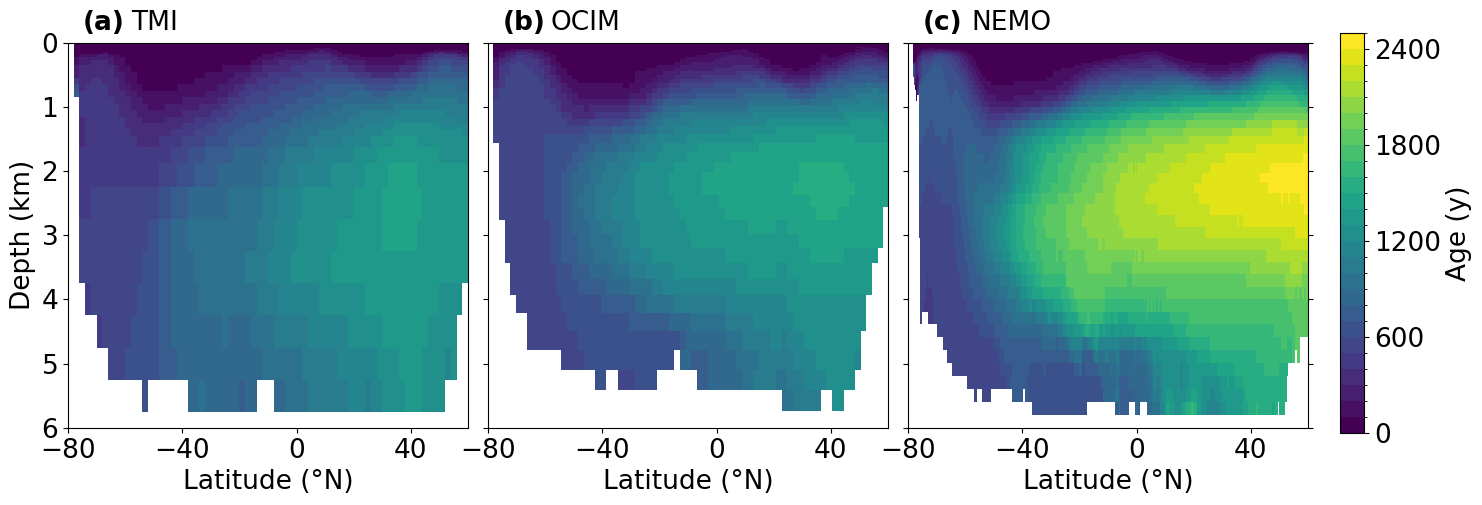

In [27]:
fig = plt.figure(figsize = (16, 5))
gs = fig.add_gridspec(1, 3, wspace=0.05, hspace=0.14); font = 19
vmin = 0; vmax = 2500; nbins = 26

ax = fig.add_subplot(gs[0, 0])
pco = uf.plot_Pac_mean(ax, TMI_2deg, 'ideal_age', l_depth_TMI, mask_TMI_Pac, l_lat_TMI3D, font = font, nbins = nbins, vmax = vmax, cb = False,
                       xlim = (-80, 60), xticks = [-80 + i*40 for i in range(8)])
ax.text(-75, -200, uf.panels_letter_parenthesis[0], fontsize = font, fontweight = 'bold')
ax.text(-58, -200, 'TMI', fontsize = font)
ax.set_xlabel('Latitude (°N)', fontsize = font)

ax = fig.add_subplot(gs[0, 1])
pco = uf.plot_Pac_mean(ax, ocim_frac, 'ideal_age', l_depth_ocim, mask_ocim_Pac, l_lat_ocim3D, font = font, nbins = nbins, vmax = vmax, cb = False,
                       xlim = (-80, 60), xticks = [-80 + i*40 for i in range(8)], ylabels = False)
ax.text(-75, -200, uf.panels_letter_parenthesis[1], fontsize = font, fontweight = 'bold')
ax.text(-58, -200, 'OCIM', fontsize = font)
ax.set_xlabel('Latitude (°N)', fontsize = font)

ax = fig.add_subplot(gs[0, 2])
pco = uf.plot_Pac_mean(ax, nemo_frac, 'ideal_age', l_depth, mask_NEMO_Pac, new_nav_lat, font = font, nbins = nbins, vmax = vmax, cb = False,
                       xlim = (-80, 60), xticks = [-80 + i*40 for i in range(8)], ylabels = False, )
ax.text(-75, -200, uf.panels_letter_parenthesis[2], fontsize = font, fontweight = 'bold')
ax.text(-58, -200, 'NEMO', fontsize = font)
ax.tick_params(axis='y', which='both', left=True, right=True)
ax.set_xlabel('Latitude (°N)', fontsize = font)

uf.add_cbar(fig, pco[0], x = 0.92, label = 'Age (y)', ticks = [600* i for i in range(5)], fontsize = font, width = 0.015)

plt.savefig(fig_path + 'ageZM_Pacific_TMI2deg_vs_OCIM_tm21ah21.png', bbox_inches = 'tight')

In [28]:
extrapolated_age = uf.get_extrapolated_age('tm21ah21')

In [29]:
mask_NP_NEMO = ((new_nav_lat <= 60) & (new_nav_lat >= 0) & (new_nav_lon <= 250) & (new_nav_lon >= 150)) & mask_NEMO_Pac
mask_NP_ocim = ((l_lat_ocim3D <= 60) & (l_lat_ocim3D >= 0) & (l_lon_ocim3D <= 250) & (l_lon_ocim3D >= 150)) & mask_ocim_Pac
mask_NP_TMI = ((l_lat_TMI3D <= 60) & (l_lat_TMI3D >= 0) & (l_lon_TMI3D <= 250) & (l_lon_TMI3D >= 150)) & mask_TMI_Pac

In [30]:
l_idepth = [39, 53, 64]; l_idepth_ocim = [19, 32, 41]; l_idepth_TMI = [13, 25, 29]
print('Maximum age at 500m for NEMO: ' + str(int(np.nanmax(np.where(mask_NP_NEMO, extrapolated_age[l_idepth[0]], np.nan)))) + 'y, OCIM: ' + str(int(np.nanmax(np.where(mask_NP_ocim, ocim_frac['ideal_age'].values[l_idepth_ocim[0]], np.nan)))) + 'y, TMI: ' + str(int(np.nanmax(np.where(mask_NP_TMI, TMI_2deg['ideal_age'].values[l_idepth_TMI[0]], np.nan)))) + 'y')
print('Maximum age at 2000m for NEMO: ' + str(int(np.nanmax(np.where(mask_NP_NEMO, extrapolated_age[l_idepth[1]], np.nan)))) + 'y, OCIM: ' + str(int(np.nanmax(np.where(mask_NP_ocim, ocim_frac['ideal_age'].values[l_idepth_ocim[1]], np.nan)))) + 'y, TMI: ' + str(int(np.nanmax(np.where(mask_NP_TMI, TMI_2deg['ideal_age'].values[l_idepth_TMI[1]], np.nan)))) + 'y')
print('Maximum age at 4000m for NEMO: ' + str(int(np.nanmax(np.where(mask_NP_NEMO, extrapolated_age[l_idepth[2]], np.nan)))) + 'y, OCIM: ' + str(int(np.nanmax(np.where(mask_NP_ocim, ocim_frac['ideal_age'].values[l_idepth_ocim[2]], np.nan)))) + 'y, TMI: ' + str(int(np.nanmax(np.where(mask_NP_TMI, TMI_2deg['ideal_age'].values[l_idepth_TMI[2]], np.nan)))) + 'y')

Maximum age at 500m for NEMO: 1492y, OCIM: 902y, TMI: 878y
Maximum age at 2000m for NEMO: 2519y, OCIM: 1640y, TMI: 1535y
Maximum age at 4000m for NEMO: 2263y, OCIM: 1445y, TMI: 1527y


In [31]:
mask_seafloor = uf.get_seafloor_mask(nemo_frac, labeldye = 'dyeLL')
mask_seafloor_ocim = uf.get_seafloor_mask(ocim_frac, labeldye = 'dyeLL', labelx = 'xt', labely = 'yt')
mask_seafloor_TMI = uf.get_seafloor_mask(TMI_2deg, labeldye = 'dyeLL', labelx = 'xt', labely = 'yt')

In [32]:
seafloor_age_ocim = np.nansum(np.where(mask_seafloor_ocim, ocim_frac['ideal_age'], np.nan), axis = 0); seafloor_age_ocim[seafloor_age_ocim == 0] = np.nan
seafloor_age_tm21 = np.nansum(np.where(mask_seafloor, extrapolated_age, np.nan), axis = 0); seafloor_age_tm21[seafloor_age_tm21 == 0] = np.nan
seafloor_age_TMI = np.nansum(np.where(mask_seafloor_TMI, TMI_2deg['ideal_age'], np.nan), axis = 0); seafloor_age_TMI[seafloor_age_TMI == 0] = np.nan

In [33]:
seafloor_age_ocim_regrid = np.zeros(np.shape(seafloor_age_ocim)); l_lon_plot_ocim = l_lon_ocim.copy()
ilon_73_ocim = uf.approx_depth(73, l_lon_ocim)[1]
seafloor_age_ocim_regrid[:, 180 - ilon_73_ocim:] = seafloor_age_ocim[:, :ilon_73_ocim]; l_lon_plot_ocim[180 - ilon_73_ocim:] = l_lon_ocim[:ilon_73_ocim] + 360
seafloor_age_ocim_regrid[:, :180 - ilon_73_ocim] = seafloor_age_ocim[:, ilon_73_ocim:]; l_lon_plot_ocim[:180 - ilon_73_ocim] = l_lon_ocim[ilon_73_ocim:]

seafloor_age_TMI_regrid = np.zeros(np.shape(seafloor_age_TMI)); l_lon_plot_TMI = l_lon_TMI.copy()
ilon_73_TMI = uf.approx_depth(73, l_lon_TMI)[1]
seafloor_age_TMI_regrid[:, 180 - ilon_73_TMI:] = seafloor_age_TMI[:, :ilon_73_TMI]; l_lon_plot_TMI[180 - ilon_73_TMI:] = l_lon_ocim[:ilon_73_TMI] + 360
seafloor_age_TMI_regrid[:, :180 - ilon_73_TMI] = seafloor_age_TMI[:, ilon_73_TMI:]; l_lon_plot_TMI[:180 - ilon_73_TMI] = l_lon_ocim[ilon_73_TMI:]

In [34]:
array_plot_ocim = np.zeros(np.shape(ocim_frac['ideal_age'].values.copy()))
array_plot_ocim[:, :, 180 - ilon_73_ocim:] = ocim_frac['ideal_age'].values.copy()[:, :, :ilon_73_ocim]
array_plot_ocim[:, :, :180 - ilon_73_ocim] = ocim_frac['ideal_age'].values.copy()[:, :, ilon_73_ocim:]

array_plot_TMI = np.zeros(np.shape(TMI_2deg['ideal_age'].values.copy()))
array_plot_TMI[:, :, 180 - ilon_73_TMI:] = TMI_2deg['ideal_age'].values.copy()[:, :, :ilon_73_TMI]
array_plot_TMI[:, :, :180 - ilon_73_TMI] = TMI_2deg['ideal_age'].values.copy()[:, :, ilon_73_TMI:]

In [35]:
print(l_depth[39], l_depth[53], l_depth[64]); print(l_depth_TMI[13], l_depth_TMI[25], l_depth_TMI[29])

508.639892578125 1945.2955322265625 3897.98193359375
500.0 2000.0 4000.0


C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19012\3465780884.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(new_nav_lon, new_nav_lat, extrapolated_age[l_idepth[i_col]], norm = norm)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19012\3465780884.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(new_nav_lon, new_nav_lat, extrapolated_age[l_idepth[i_col]], norm = norm)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19012\3465780884.py:40: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not m

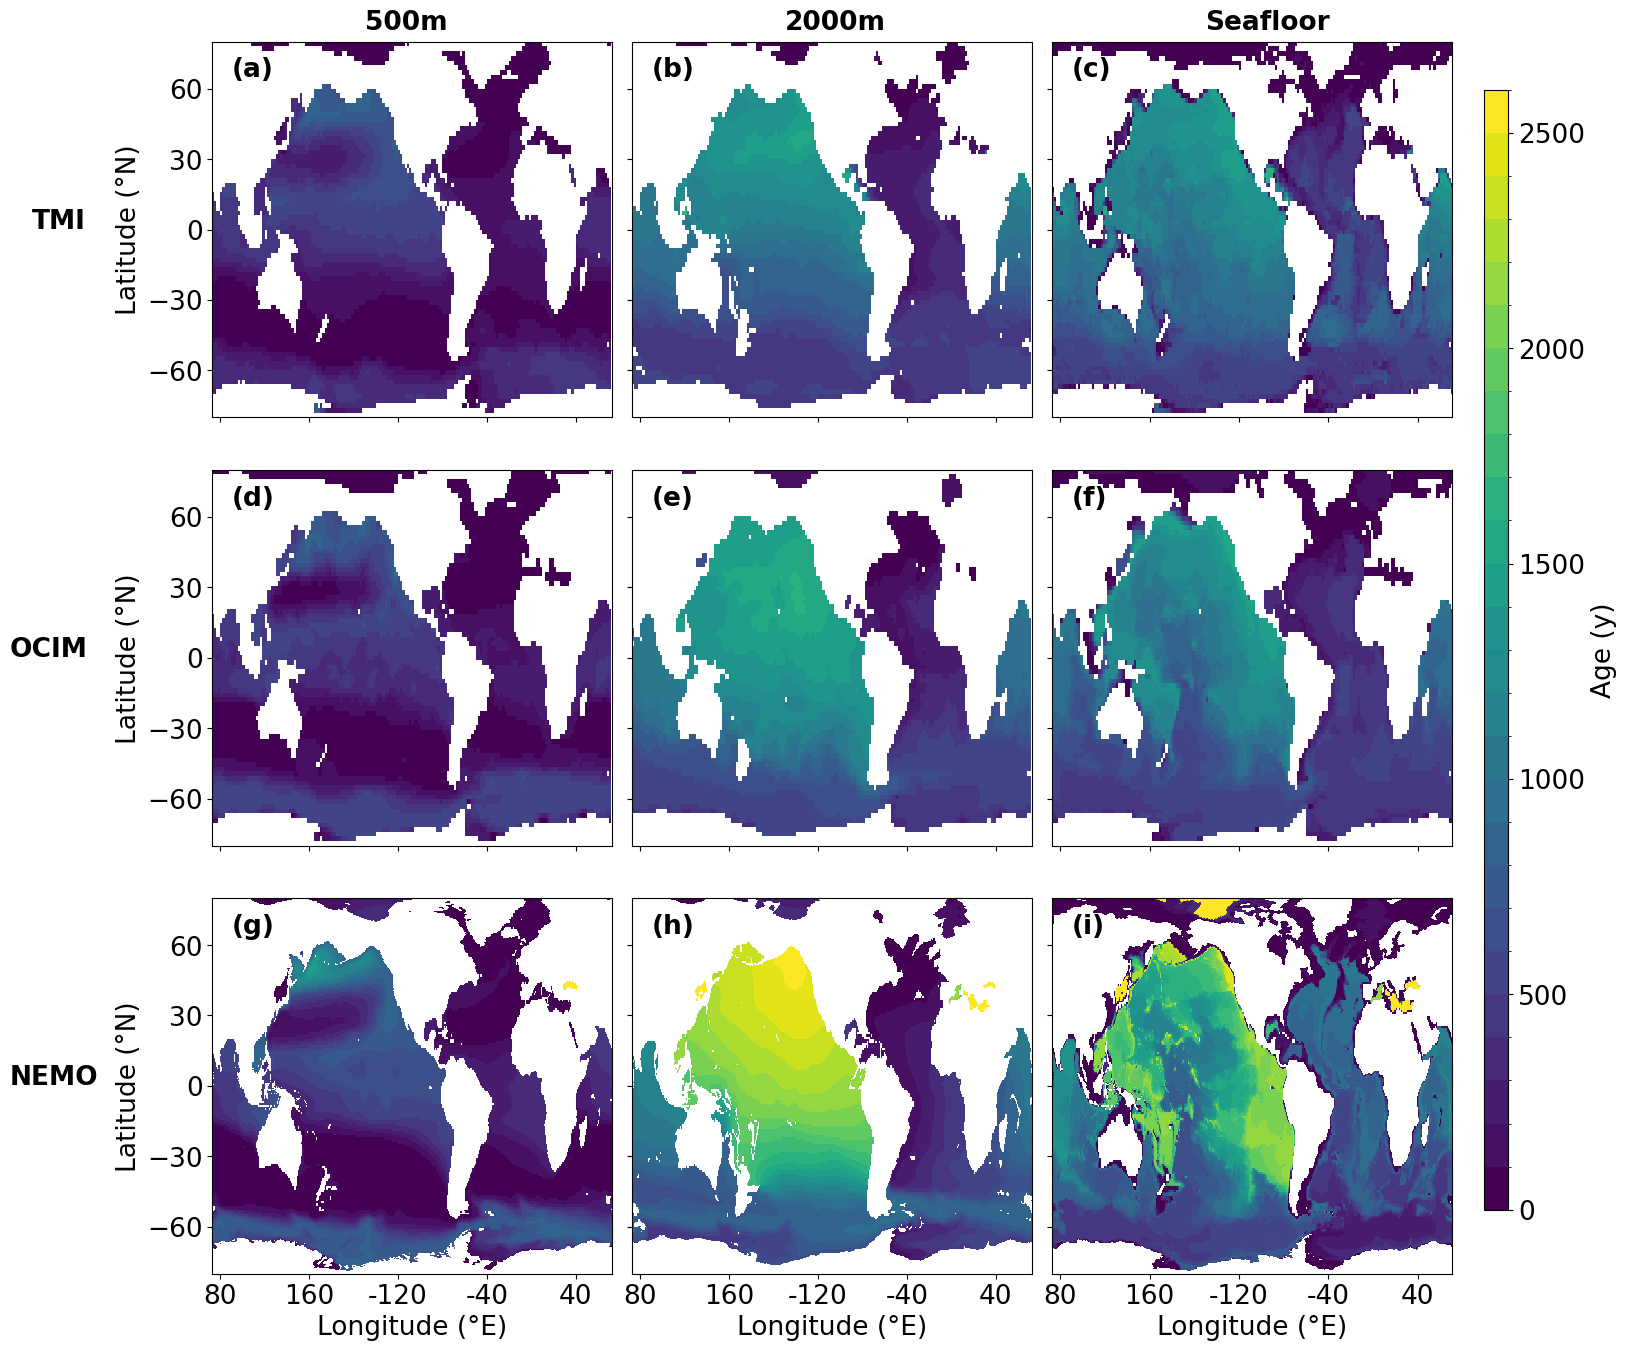

In [36]:
fig = plt.figure(figsize = (16, 16))
gs = fig.add_gridspec(3, 3, wspace=0.05, hspace=0.14)
l_idepth = [39, 53, 64]; l_idepth_ocim = [19, 32, 41]; l_idepth_TMI = [13, 25, 29]
nbins = 27; norm = uf.get_BoundNorm(0, 2600, nbins = nbins); font = 19
xlim = (73, 431); ylim = (-80, 80)

for i in range(6):
    i_ligne, i_col = i//2, i%2; xlabels, ylabels = uf.get_xylabels(3, 2, i)
    ax = fig.add_subplot(gs[i_ligne, i_col])
    if i < 2:
        pco = ax.pcolormesh(l_lon_plot_TMI, l_lat_TMI, array_plot_TMI[l_idepth_TMI[i_col]], norm = norm)
    elif i < 4:
        pco = ax.pcolormesh(l_lon_plot_ocim, l_lat_ocim, array_plot_ocim[l_idepth_ocim[i_col]], norm = norm)
    else:
        pco = ax.pcolormesh(new_nav_lon, new_nav_lat, extrapolated_age[l_idepth[i_col]], norm = norm)
    uf.plot_details_axis(ax, pco, cb = False, font = font, nbins = nbins, xlim = (73, 433), ylim = (-80, 80), xticks = [i*80 for i in range(1, 6)], 
                          yticks = [-60 + i*30 for i in range(5)], xlabels = xlabels, ylabels = ylabels)
    if xlabels:
        ax.set_xlabel('Longitude (°E)', fontsize = font); ax.set_xticklabels(['80', '160', '-120', '-40', '40'], fontsize = font)
        ax.text(210, 450, str(int(l_depth_TMI[l_idepth_TMI[i_col]])) + 'm', fontsize = font, fontweight = 'bold')
    if ylabels:
        ax.set_ylabel('Latitude (°N)', fontsize = font)
    ax.text(90, 65, uf.panels_letter_parenthesis[i_col + i_ligne * 3], fontsize = font, fontweight = 'bold')

ax = fig.add_subplot(gs[0, 2])
ax.pcolormesh(l_lon_plot_TMI, l_lat_TMI, seafloor_age_TMI_regrid, norm = norm)
ax.set_xlim(xlim); ax.set_xticks([80 * i for i in range(1, 6)]); ax.set_xticklabels([], fontsize = font)
ax.set_ylim(ylim); ax.set_yticks([-60 + 30*i for i in range(5)]); ax.set_yticklabels([])
ax.text(y = 0.5, x = -840, s = 'TMI', fontsize = font, fontweight = 'bold')
ax.text(90, 65, uf.panels_letter_parenthesis[2], fontsize = font, fontweight = 'bold')

ax = fig.add_subplot(gs[1, 2])
ax.pcolormesh(l_lon_plot_ocim, l_lat_ocim, seafloor_age_ocim_regrid, norm = norm)
ax.set_xlim(xlim); ax.set_xticks([80 * i for i in range(1, 6)]); ax.set_xticklabels([], fontsize = font)
ax.set_ylim(ylim); ax.set_yticks([-60 + 30*i for i in range(5)]); ax.set_yticklabels([])
ax.text(y = 0.5, x = -860, s = 'OCIM', fontsize = font, fontweight = 'bold')
ax.text(90, 65, uf.panels_letter_parenthesis[5], fontsize = font, fontweight = 'bold')

ax = fig.add_subplot(gs[2, 2])
ax.pcolormesh(new_nav_lon, new_nav_lat, seafloor_age_tm21, norm = norm)
ax.set_xlim(xlim); ax.set_xticks([80 * i for i in range(1, 6)]); ax.set_xticklabels(['80', '160', '-120', '-40', '40'], fontsize = font); ax.set_xlabel('Longitude (°E)', fontsize = font)
ax.set_ylim(ylim); ax.set_yticks([-60 + 30*i for i in range(5)]); ax.set_yticklabels([])
ax.text(210, 450, 'Seafloor', fontsize = font, fontweight = 'bold')
ax.text(y = 0.5, x = -860, s = 'NEMO', fontsize = font, fontweight = 'bold')
ax.text(90, 65, uf.panels_letter_parenthesis[8], fontsize = font, fontweight = 'bold')

uf.add_cbar(fig, pco, x = 0.92, ticks = [500*i for i in range(6)], fontsize = font, y = 0.15, height = .7, label = 'Age (y)')

plt.savefig(fig_path + 'ideal_age_2depths_seafloor_tm21ah21_extrapo_vs_OCIM_TMI.png', bbox_inches = 'tight')

### Maximum of NA around the Southern Ocean

In [37]:
maxNA_simus = np.empty((2, 36))
for simu in ['tm21ah21', 'tm21ahgr']:
    extra_dyes = uf.get_extrapolated_dyes(simu)
    isimu = ['tm21ah21', 'tm21ahgr'].index(simu)

    for lon in range(80, 440, 10):
        mask_nemo = (new_nav_lon >= lon - 2) & (new_nav_lon <= lon + 2) & (new_nav_lat <= -30) & (new_nav_lat >= -65)
        maxNA_simus[isimu, int((lon - 80)/10)] = np.nanmax(np.where(mask_nemo, extra_dyes[uf.dyes.index('dyeNA')][40:], np.nan))

In [38]:
l_ocim_max, l_TMI_max = [], []; l_lon = []

for lon in range(80, 433, 10):
    if lon >360: lon_ocim = lon -360
    else: lon_ocim = lon
    
    # mask_nemo = (new_nav_lon >= lon - 2) & (new_nav_lon <= lon + 2) & (new_nav_lat <= -30) & (new_nav_lat >= -60)
    mask_ocim = (l_lon_ocim3D >= lon_ocim - 2) & (l_lon_ocim3D <= lon_ocim + 2) & (l_lat_ocim3D <= -30) & (l_lat_ocim3D >= -60)
    mask_TMI = (l_lon_TMI3D >= lon_ocim - 2) & (l_lon_TMI3D <= lon_ocim + 2) & (l_lat_TMI3D <= -30) & (l_lat_TMI3D >= -60)
    
    # l_nemo_max.append(np.nanmax(np.where(mask_nemo, extratm21[uf.dyes.index('DyeNA')][46:], np.nan)))
    l_ocim_max.append(np.nanmax(np.where(mask_ocim, ocim_frac['dyeNA'][25:], np.nan)))
    l_TMI_max.append(np.nanmax(np.where(mask_TMI, TMI_2deg['dyeNA'][18:], np.nan)))
    l_lon.append(lon)

In [39]:
n = len(l_ocim_max)
l_ocim_max_reshaped, l_TMI_max_reshaped = l_ocim_max.copy(), l_TMI_max.copy(); l_lon_reshaped = l_lon.copy()
# l_nemo_max_reshaped[(n-23):] = l_nemo_max[:23]; l_nemo_max_reshaped[:(n-23)] = l_nemo_max[23:]
l_ocim_max_reshaped[(n-23):] = l_ocim_max[:23]; l_ocim_max_reshaped[:(n-23)] = l_ocim_max[23:]
l_TMI_max_reshaped[(n-23):] = l_TMI_max[:23]; l_TMI_max_reshaped[:(n-23)] = l_TMI_max[23:]
l_lon_reshaped[(n-23):] = l_lon[:23]; l_lon_reshaped[:(n-23)] = l_lon[23:]

In [40]:
maxNA_simus_reshaped = np.empty((2, 36))
for i in range(2):
    maxNA_simus_reshaped[i, (n-23):] = maxNA_simus[i, :23]; maxNA_simus_reshaped[i, :(n-23)] = maxNA_simus[i, 23:]

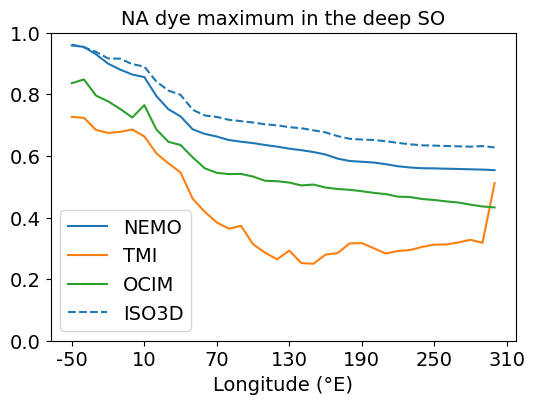

In [41]:
fig = plt.figure(figsize = (6, 4))
ax = plt.gca(); font = 14

pl = ax.plot(l_lon, maxNA_simus_reshaped[0], label = 'NEMO')
ax.plot(l_lon, l_TMI_max_reshaped, label = 'TMI')
ax.plot(l_lon, l_ocim_max_reshaped, label = 'OCIM')

ax.plot(l_lon, maxNA_simus_reshaped[1], label = 'ISO3D', color = '#1f77b4', ls ='--')

ax.set_xticks([80 + i * 60 for i in range(7)]); ax.set_xticklabels([str(-50 + i* 60) for i in range(7)], fontsize = font)
ax.set_yticks([i * 0.2 for i in range(6)]); ax.set_yticklabels([format(i * 0.2, '.1f') for i in range(6)], fontsize = font)
ax.set_xlabel('Longitude (°E)', fontsize = font)
# ax.set_ylabel('Dye concentration', fontsize = font); 
ax.set_ylim(0, 1)
ax.set_title('NA dye maximum in the deep SO', fontsize = font)

ax.legend(fontsize = font)
plt.savefig(fig_path + 'NA_dye_max_ACC.png', bbox_inches = 'tight')

### Diffusiveness assessment

In [43]:
transient_nemo_frac = xr.open_dataset(data_path + 'NEMOref_transient_dyes.nc')

In [ ]:
transient_dyes_TMI = xr.open_dataset(data_path + 'TMI_transient_dyes.nc')
transient_dyes_ocim = xr.open_dataset(data_path + 'OCIM_transient_dyes.nc')

In [61]:
stratif_nemo = transient_nemo_frac[['conservative_temperature', 'preformed_salinity', 'xt', 'yt', 'zt']].mean(dim = 'Months')
transient_nemo_frac.close()

In [52]:
stratif_ocim = transient_dyes_ocim[['potential_temperature', 'practical_salinity', 'xt', 'yt', 'zt']]
stratif_TMI = transient_dyes_TMI[['potential_temperature', 'practical_salinity', 'xt', 'yt', 'zt']]
transient_dyes_ocim.close(); transient_dyes_TMI.close()

In [54]:
import gsw
from scipy.interpolate import interp1d

In [56]:
depth_TMI = np.full(stratif_TMI['potential_temperature'].shape, np.nan)
for i in range(stratif_TMI['potential_temperature'].shape[0]):
    depth_TMI[i][~np.isnan(stratif_TMI['potential_temperature'])[i]] = l_depth_TMI[i]
stratif_TMI['pressure'] = xr.DataArray(gsw.p_from_z(-depth_TMI, l_lat_TMI3D), dims=('Depth', 'Latitude', 'Longitude'))

In [57]:
depth_ocim = np.full(stratif_ocim['potential_temperature'].shape, np.nan)
for i in range(stratif_ocim['potential_temperature'].shape[0]):
    depth_ocim[i][~np.isnan(stratif_ocim['potential_temperature'])[i]] = l_depth_ocim[i]
stratif_ocim['pressure'] = xr.DataArray(gsw.p_from_z(-depth_ocim, l_lat_ocim3D), dims=('Depth', 'Latitude', 'Longitude'))

In [58]:
stratif_TMI['so'] = gsw.SA_from_SP(stratif_TMI['practical_salinity'], stratif_TMI['pressure'], l_lon_TMI3D, l_lat_TMI3D)
stratif_TMI['thetao'] = gsw.CT_from_pt(stratif_TMI['so'], stratif_TMI['potential_temperature'])

In [59]:
stratif_ocim['so'] = gsw.SA_from_SP(stratif_ocim['practical_salinity'], stratif_ocim['pressure'], l_lon_ocim3D, l_lat_ocim3D)
stratif_ocim['thetao'] = gsw.CT_from_pt(stratif_ocim['so'], stratif_ocim['potential_temperature'])

In [64]:
depth_nemo = np.full(stratif_nemo['conservative_temperature'].shape, np.nan)
for i in range(stratif_nemo['conservative_temperature'].shape[0]):
    depth_nemo[i][~np.isnan(stratif_nemo['conservative_temperature'])[i]] = l_depth[i]

stratif_nemo['pressure'] = xr.DataArray(gsw.p_from_z(-depth_nemo, new_nav_lat), dims=('Depth', 'Latitude', 'Longitude'))
stratif_nemo['so'] = gsw.SA_from_Sstar(stratif_nemo['preformed_salinity'], stratif_nemo['pressure'], new_nav_lon, new_nav_lat)
stratif_nemo['thetao'] = stratif_nemo['conservative_temperature']

In [65]:
stratif_nemo['sigma2'] = gsw.sigma2(stratif_nemo['so'], stratif_nemo['thetao'])
stratif_TMI['sigma2'] = gsw.sigma2(stratif_TMI['so'], stratif_TMI['thetao'])
stratif_ocim['sigma2'] = gsw.sigma2(stratif_ocim['so'], stratif_ocim['thetao'])

#### Map the dyes in density-space

In [66]:
# Here we define our new z coordinate (instead of depth)
gamma_bin = [10 + i for i in range(20)]
for i in range(50): gamma_bin.append(30+0.1*i)
for i in range(141): gamma_bin.append(35 + 0.02*i)
gamma_bin_array = np.array(gamma_bin)

In [67]:
sigma2 = stratif_nemo['sigma2'].values; sigma2_TMI = stratif_TMI['sigma2'].values; sigma2_ocim = stratif_ocim['sigma2'].values

In [68]:
result_depths = np.full((211, 331, 360), np.nan)
dyes = np.full((6, 211, 331, 360), np.nan)
t = time.time()

for lat in range(331):
    for lon in range(360):
        density_profile = sigma2[:, lat, lon]
        valid_mask = ~np.isnan(density_profile)
        if np.sum(valid_mask) < 2:
            continue
        interpolator = interp1d(density_profile[valid_mask], l_depth[valid_mask], bounds_error=False)
        result_depths[:, lat, lon] = interpolator(gamma_bin)
        for dye in range(len(uf.dyes)):
            interp_dye = interp1d(density_profile[valid_mask], nemo_frac['dye' + uf.l_patches2[dye]][:, lat, lon][valid_mask], bounds_error=False)
            dyes[dye, :, lat, lon] = interp_dye(gamma_bin)
    if lat%50 ==0:
        print(lat)

0
50
100
150
200
250
300


In [69]:
l_depth_TMI_array = np.array(l_depth_TMI)
dyes_TMI_values = [TMI_2deg['dye' + dye].values for dye in uf.l_patches2]

In [70]:
result_depths_TMI = np.full((211, 90, 180), np.nan)
dyes_TMI = np.full((6, 211, 90, 180), np.nan)
t = time.time()

for lat in range(90):
    for lon in range(180):
        density_profile = sigma2_TMI[:, lat, lon]
        valid_mask = ~np.isnan(density_profile)
        if np.sum(valid_mask) < 2:
            continue
        interpolator = interp1d(density_profile[valid_mask], l_depth_TMI_array[valid_mask], bounds_error=False)
        result_depths_TMI[:, lat, lon] = interpolator(gamma_bin)
        for dye in range(6):
            interp_dye = interp1d(density_profile[valid_mask], dyes_TMI_values[dye][:, lat, lon][valid_mask], bounds_error=False)
            dyes_TMI[dye, :, lat, lon] = interp_dye(gamma_bin)
    if lat%50 ==0:
        print(lat)

print(time.time() - t)

0
50
4.250259160995483


In [71]:
result_depths_ocim = np.full((211, 91, 180), np.nan)
dyes_ocim = np.full((6, 211, 91, 180), np.nan)
t = time.time()

for lat in range(91):
    for lon in range(180):
        density_profile = sigma2_ocim[:, lat, lon]
        valid_mask = ~np.isnan(density_profile)
        if np.sum(valid_mask) < 2:
            continue
        interpolator = interp1d(density_profile[valid_mask], l_depth_ocim[valid_mask], bounds_error=False)
        result_depths_ocim[:, lat, lon] = interpolator(gamma_bin)
        for idye in range(len(uf.l_patches2)):
            interp_dye = interp1d(density_profile[valid_mask], ocim_frac['dye' + uf.l_patches2[idye]].values[:, lat, lon][valid_mask], bounds_error=False)
            dyes_ocim[idye, :, lat, lon] = interp_dye(gamma_bin)
    if lat%50 ==0:
        print(lat)

print(time.time() - t)

0
50
7.410717248916626


#### Compute the volume associated to each density class defined by gamma_bin

In [72]:
area_NEMO = nemo_frac['grid_cell_area'].values
sum_nonnan_lvls = np.count_nonzero(~np.isnan(nemo_frac['dyeAA']), axis=0) - 1
last_depth = l_depth[sum_nonnan_lvls]; last_depth[last_depth == l_depth[0]] = np.nan

In [73]:
diff_depths = np.full((211, 331, 360), np.nan)
# we do not want locations where there is less than 2 lvls
valid_depths = (np.count_nonzero(~np.isnan(result_depths), axis = 0) >= 2)

masked_data = np.nan_to_num(result_depths, nan=np.inf)
indices = np.argmax(masked_data != np.inf, axis=0)
x, y = np.meshgrid(np.arange(result_depths.shape[1]), np.arange(result_depths.shape[2]), indexing='ij')


# Invert the order of z-axis (here axis 0)
data_reversed = result_depths[::-1, :, :]
masked_data_reversed = np.nan_to_num(data_reversed, nan=np.inf)
indices_reversed = np.argmax(masked_data_reversed != np.inf, axis=0)
adjusted_indices = result_depths.shape[0] - 1 - indices_reversed

# last_non_nan_values = result_depths[adjusted_indices, x, y]
diff_depths[1:-1] = (result_depths[2:] - result_depths[:-2])/2
diff_depths[indices, x, y] = ((result_depths[indices + 1, x, y] - result_depths[indices, x, y])/2 + result_depths[indices, x, y])
diff_depths[adjusted_indices, x, y] = ((result_depths[adjusted_indices, x, y] - result_depths[adjusted_indices - 1, x, y])/2 + last_depth - result_depths[adjusted_indices, x, y])

In [74]:
area_TMI = uf.area_TMI(TMI_2deg)
sum_nonnan_lvls_TMI = np.count_nonzero(~np.isnan(TMI_2deg['dyeAA']), axis=0) - 1
last_depth_TMI = l_depth_TMI_array[sum_nonnan_lvls_TMI]; last_depth_TMI[last_depth_TMI == l_depth_TMI[0]] = np.nan

In [75]:
diff_depths_TMI = np.full((211, 90, 180), np.nan)
# we do not want locations where there is less than 2 lvls
valid_depths = (np.count_nonzero(~np.isnan(result_depths_TMI), axis = 0) >= 2)

masked_data = np.nan_to_num(result_depths_TMI, nan=np.inf)
indices = np.argmax(masked_data != np.inf, axis=0)
x, y = np.meshgrid(np.arange(result_depths_TMI.shape[1]), np.arange(result_depths_TMI.shape[2]), indexing='ij')


# Inverser l'ordre des éléments le long de l'axe des profondeurs (axe 0 dans cet exemple)
data_reversed = result_depths_TMI[::-1, :, :]
masked_data_reversed = np.nan_to_num(data_reversed, nan=np.inf)
indices_reversed = np.argmax(masked_data_reversed != np.inf, axis=0)
adjusted_indices = result_depths_TMI.shape[0] - 1 - indices_reversed

# last_non_nan_values = result_depths[adjusted_indices, x, y]
diff_depths_TMI[1:-1] = (result_depths_TMI[2:] - result_depths_TMI[:-2])/2
diff_depths_TMI[indices, x, y] = ((result_depths_TMI[indices + 1, x, y] - result_depths_TMI[indices, x, y])/2 + result_depths_TMI[indices, x, y])
diff_depths_TMI[adjusted_indices, x, y] = ((result_depths_TMI[adjusted_indices, x, y] - result_depths_TMI[adjusted_indices - 1, x, y])/2 + last_depth_TMI - result_depths_TMI[adjusted_indices, x, y])

In [76]:
n_y = len(list(l_lat_ocim)); n_x = len(list(l_lon_ocim)); n_depth = len(list(l_depth_ocim))

# here we compute the area of the ocean surface
dy = uf.earth_rad*2*(np.pi/180)
dx = uf.earth_rad*2*(np.pi/180)*abs(np.cos(l_lat_ocim*np.pi/180))
area_ocim = np.empty((n_y, n_x))
for ilon in range(n_x): 
    for ilat in range(n_y): area_ocim[ilat, ilon] = dy * dx[ilat]

In [77]:
sum_nonnan_lvls_ocim = np.count_nonzero(~np.isnan(ocim_frac['dyeAA']), axis = 0) - 1
last_depth_ocim = l_depth_ocim[sum_nonnan_lvls_ocim]; last_depth_ocim[last_depth_ocim == l_depth_ocim[0]] = np.nan

In [78]:
diff_depths_ocim = np.full((211, 91, 180), np.nan)
# we do not want locations where there is less than 2 lvls
valid_depths = (np.count_nonzero(~np.isnan(result_depths_ocim), axis = 0) >= 2)

masked_data = np.nan_to_num(result_depths_ocim, nan=np.inf)
indices = np.argmax(masked_data != np.inf, axis=0)
x, y = np.meshgrid(np.arange(result_depths_ocim.shape[1]), np.arange(result_depths_ocim.shape[2]), indexing='ij')


# Inverser l'ordre des éléments le long de l'axe des profondeurs (axe 0 dans cet exemple)
data_reversed = result_depths_ocim[::-1, :, :]
masked_data_reversed = np.nan_to_num(data_reversed, nan=np.inf)
indices_reversed = np.argmax(masked_data_reversed != np.inf, axis=0)
adjusted_indices = result_depths_ocim.shape[0] - 1 - indices_reversed

# last_non_nan_values = result_depths[adjusted_indices, x, y]
diff_depths_ocim[1:-1] = (result_depths_ocim[2:] - result_depths_ocim[:-2])/2
diff_depths_ocim[indices, x, y] = ((result_depths_ocim[indices + 1, x, y] - result_depths_ocim[indices, x, y])/2 + result_depths_ocim[indices, x, y])
diff_depths_ocim[adjusted_indices, x, y] = ((result_depths_ocim[adjusted_indices, x, y] - result_depths_ocim[adjusted_indices - 1, x, y])/2 + last_depth_ocim - result_depths_ocim[adjusted_indices, x, y])

In [79]:
vol_NEMO_gamma = diff_depths * area_NEMO
vol_TMI_gamma = diff_depths_TMI * area_TMI
vol_ocim_gamma = diff_depths_ocim * area_ocim
np.shape(vol_NEMO), np.nansum(vol_NEMO), np.nansum(vol_TMI), np.nansum(vol_ocim)

((6, 75, 331, 360),
 np.float64(1.34012659121964e+18),
 np.float64(1.2350508027485074e+18),
 np.float64(1.3233179011500147e+18))

#### Volume distribution in function of density

Since most of the volume is due to few different denisty classes (that fit the deep ocean), we need to normalize to the volume filled the volume filled by dyes to see the distribution "proportion".

In [80]:
vol_sum = np.nansum(vol_NEMO_gamma, axis = (1, 2)); vol_TMI_sum = np.nansum(vol_TMI_gamma, axis = (1, 2)); vol_ocim_sum = np.nansum(vol_ocim_gamma, axis = (1, 2))

In [81]:
vols_sigma2_norm = np.empty_like((vol_sum)); vols_sigma2_TMI_norm = np.empty_like((vol_TMI_sum)); vols_sigma2_ocim_norm = np.empty_like((vol_ocim_sum))
# here we normalize by dividing the volume by the difference between the defined gamma bins
vols_sigma2_norm[:21] = vol_sum[:21] * 0.02/1; vols_sigma2_TMI_norm[:21] = vol_TMI_sum[:21] * 0.02/1; vols_sigma2_ocim_norm[:21] = vol_ocim_sum[:21] * 0.02/1
vols_sigma2_norm[21:71] = vol_sum[21:71] * 0.02/0.1; vols_sigma2_TMI_norm[21:71] = vol_TMI_sum[21:71] * 0.02/0.1; vols_sigma2_ocim_norm[21:71] = vol_ocim_sum[21:71] * 0.02/0.1
vols_sigma2_norm[71:] = vol_sum[71:]; vols_sigma2_TMI_norm[71:] = vol_TMI_sum[71:]; vols_sigma2_ocim_norm[71:] = vol_ocim_sum[71:]

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19012\2681470918.py:7: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlim(35, 37.5); ax.set_xlabel('$\sigma_2$ $(kg.m^{-3})$', fontsize = font); ax.set_xticks([35 + 0.5 * i for i in range(6)]); ax.set_xticklabels([35, 35.5, 36, 36.5, 37, 37.5], fontsize = font)


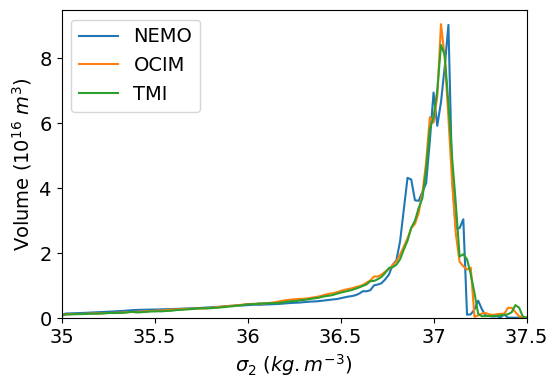

In [82]:
fig = plt.figure(figsize = (6, 4)); ax = plt.gca(); font = 14

ax.plot(gamma_bin, vols_sigma2_norm * 10**-16, label = 'NEMO')
ax.plot(gamma_bin, vols_sigma2_ocim_norm * np.nansum(vols_sigma2_norm)/np.nansum(vols_sigma2_ocim_norm) * 10**-16, label = 'OCIM')
ax.plot(gamma_bin, vols_sigma2_TMI_norm * np.nansum(vols_sigma2_norm)/np.nansum(vols_sigma2_TMI_norm) * 10**-16, label = 'TMI')

ax.set_xlim(35, 37.5); ax.set_xlabel('$\sigma_2$ $(kg.m^{-3})$', fontsize = font); ax.set_xticks([35 + 0.5 * i for i in range(6)]); ax.set_xticklabels([35, 35.5, 36, 36.5, 37, 37.5], fontsize = font)
ax.set_ylim(0, 9.5); ax.set_ylabel('Volume $(10^{16}$ $m^3)$', fontsize = font); ax.set_yticks([2 * i for i in range(5)]); ax.set_yticklabels([2 * i for i in range(5)], fontsize = font)
ax.legend(fontsize = font)

plt.savefig(fig_path + 'volume_distribution_sigma2.png', bbox_inches = 'tight')

#### Similarity score

In [90]:
vols_sigma2_dyes = np.full((6, 211), np.nan); vols_sigma2_dyes_TMI = np.full((6, 211), np.nan); vols_sigma2_dyes_ocim = np.full((6, 211), np.nan)
for i in range(len(uf.dyes)):
    vols_sigma2_dyes[i] = np.nansum(vol_NEMO_gamma * dyes[i], axis = (1, 2))
    vols_sigma2_dyes_TMI[i] = np.nansum(vol_TMI_gamma * dyes_TMI[i], axis = (1, 2))
    vols_sigma2_dyes_ocim[i] = np.nansum(vol_ocim_gamma * dyes_ocim[i], axis = (1, 2))

In [91]:
vols_sigma2_dyes_norm = np.zeros(np.shape(vols_sigma2_dyes)); vols_sigma2_dyes_norm[:] = np.nan
vols_sigma2_dyes_TMI_norm = np.zeros(np.shape(vols_sigma2_dyes_TMI)); vols_sigma2_dyes_TMI_norm[:] = np.nan
vols_sigma2_dyes_ocim_norm = np.zeros(np.shape(vols_sigma2_dyes_ocim)); vols_sigma2_dyes_ocim_norm[:] = np.nan

vols_sigma2_dyes_norm[:, :21] = vols_sigma2_dyes[:, :21] * 0.02/1; vols_sigma2_dyes_TMI_norm[:, :21] = vols_sigma2_dyes_TMI[:, :21] * 0.02/1; vols_sigma2_dyes_ocim_norm[:, :21] = vols_sigma2_dyes_ocim[:, :21] * 0.02/1
vols_sigma2_dyes_norm[:, 21:71] = vols_sigma2_dyes[:, 21:71] * 0.02/0.1; vols_sigma2_dyes_TMI_norm[:, 21:71] = vols_sigma2_dyes_TMI[:, 21:71] * 0.02/0.1; vols_sigma2_dyes_ocim_norm[:, 21:71] = vols_sigma2_dyes_ocim[:, 21:71] * 0.02/0.1
vols_sigma2_dyes_norm[:, 71:] = vols_sigma2_dyes[:, 71:]; vols_sigma2_dyes_TMI_norm[:, 71:] = vols_sigma2_dyes_TMI[:, 71:]; vols_sigma2_dyes_ocim_norm[:, 71:] = vols_sigma2_dyes_ocim[:, 71:]

In [92]:
vol_sum_norm = np.nansum(vols_sigma2_dyes_norm, axis = 0); vol_sum_TMI_norm = np.nansum(vols_sigma2_dyes_TMI_norm, axis = 0); vol_sum_ocim_norm = np.nansum(vols_sigma2_dyes_ocim_norm, axis = 0)

In [93]:
euclid_norm = [np.linalg.norm(vols_sigma2_dyes_norm[i]/np.nansum(vols_sigma2_dyes_norm[i]) - vol_sum_norm/np.nansum(vol_sum_norm)) for i in range(6)]
euclid_norm_TMI = [np.linalg.norm(vols_sigma2_dyes_TMI_norm[i]/np.nansum(vols_sigma2_dyes_TMI_norm[i]) - vol_sum_TMI_norm/np.nansum(vol_sum_TMI_norm)) for i in range(6)]
euclid_norm_ocim = [np.linalg.norm(vols_sigma2_dyes_ocim_norm[i]/np.nansum(vols_sigma2_dyes_ocim_norm[i]) - vol_sum_ocim_norm/np.nansum(vol_sum_ocim_norm)) for i in range(6)]

In [94]:
# vol_area = uf.vol_area(ds_averaged)
vol_NEMO = [np.multiply(nemo_frac[dye].values, nemo_frac['dVt'].values) for dye in uf.dyes]
dye_mean_conc_NEMO = [np.nansum(np.multiply(nemo_frac[uf.dyes[i]].values, vol_NEMO[i])/np.nansum(vol_NEMO[i])) for i in range(len(vol_NEMO))]

In [95]:
vol_ocim = [np.multiply(ocim_frac['dVt'].values, ocim_frac[dye].values) for dye in uf.dyes]
dye_mean_conc_ocim = [np.nansum(np.multiply(ocim_frac[uf.dyes[i]].values, vol_ocim[i])/np.nansum(vol_ocim[i])) for i in range(len(uf.l_patches2))]

In [96]:
vol_TMI = [np.multiply(TMI_2deg[dye], volume_depth_TMI) for dye in uf.dyes]
dye_mean_conc_TMI = [np.nansum(np.multiply(TMI_2deg[uf.dyes[i]], vol_TMI[i])/np.nansum(vol_TMI[i])) for i in range(len(vol_TMI))]

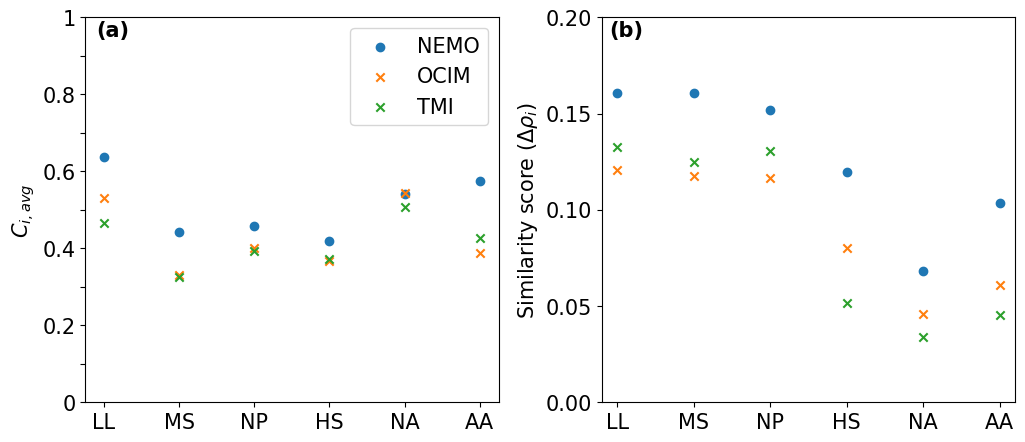

In [98]:
fig = plt.figure(figsize = (12, 5))
gs = fig.add_gridspec(1, 2, wspace = 0.25); font = 15; alpha = 1

ax = fig.add_subplot(gs[0, 0])
ax.scatter(range(6), dye_mean_conc_NEMO, marker = 'o', label = 'NEMO', alpha = alpha)
ax.scatter(range(6), dye_mean_conc_ocim, marker = 'x', label = 'OCIM', alpha = alpha)
ax.scatter(range(6), dye_mean_conc_TMI, marker = 'x', label = 'TMI', alpha = alpha)
ax.set_ylim(0, 1); ax.set_ylabel('$C_{i,avg}$', fontsize = font)
ax.set_xticks([0, 1, 2, 3, 4, 5]); ax.set_xticklabels(uf.l_patches2, fontsize = font)
ax.set_yticks([i*0.1 for i in range(11)]); ax.set_yticklabels(['0', '', '0.2', '', '0.4', '', '0.6', '', '0.8', '', '1'], fontsize = font)
ax.text(-0.1, 0.95, '(' + uf.panels_letter[0] + ')', fontsize = font, fontweight = 'bold')
ax.legend(loc = 'upper right', fontsize = font)

ax = fig.add_subplot(gs[0, 1])
ax.scatter(range(6), euclid_norm, label = 'NEMO', marker = 'o')
ax.scatter(range(6), euclid_norm_ocim, label = 'OCIM', marker = 'x')
ax.scatter(range(6), euclid_norm_TMI, label = 'TMI', marker = 'x')
ax.set_xlim(-0.2, 5.2); ax.set_xticks([i for i in range(6)]); ax.set_xticklabels(uf.l_patches2, fontsize = font)
ax.set_ylim(0, 0.2); ax.set_yticks([0.05 * i for i in range(5)]); ax.set_yticklabels([format(0.05 * i, '.2f') for i in range(5)], fontsize = font); ax.set_ylabel(r'Similarity score $(\Delta \rho_i )$', fontsize = font)
ax.text(-0.1, 0.19, '(' + uf.panels_letter[1] + ')', fontsize = font, fontweight = 'bold')


plt.savefig(fig_path + 'measure_diffusiveness_OCIM_vs_TMI_REF2.png', bbox_inches = 'tight')

## Transient comparison

In [9]:
transient_nemo_frac = xr.open_dataset(data_path + 'NEMOref_transient_dyes.nc')

In [10]:
TMI_2deg_timeseries = xr.open_dataset(data_path + 'TMI_transient_dyes.nc')
TMI_2deg_timeseries['dyeTot'] = TMI_2deg_timeseries['dyeAA'] + TMI_2deg_timeseries['dyeNA'] + TMI_2deg_timeseries['dyeHS'] + TMI_2deg_timeseries['dyeNP'] + TMI_2deg_timeseries['dyeMS'] + TMI_2deg_timeseries['dyeLL']

In [11]:
transient_dyes_ocim = xr.open_dataset(data_path + 'OCIM_transient_dyes.nc')
transient_dyes_ocim['dyeTot'] = transient_dyes_ocim['dyeAA'] + transient_dyes_ocim['dyeNA'] + transient_dyes_ocim['dyeHS'] + transient_dyes_ocim['dyeNP'] + transient_dyes_ocim['dyeMS'] + transient_dyes_ocim['dyeLL']

In [13]:
vol_TMI_depth = uf.vol_depth_TMI(TMI_2deg)
vol_tot_TMI = np.nansum(vol_TMI_depth)

vol_OCIM = ocim_frac['dVt'].values
vol_tot_ocim = np.nansum(vol_OCIM)

In [14]:
l_volume_filled_TMI = []; years = TMI_2deg_timeseries['years'].values

for i in range(np.shape(years)[0]):
    l_volume_filled_TMI.append(np.nansum(np.multiply(vol_TMI_depth, TMI_2deg_timeseries['dyeTot'].values[i])))

In [15]:
l_volume_filled_OCIM = []; years_OCIM = transient_dyes_ocim['Time'].values

for i in range(np.shape(years_OCIM)[0]):
    l_volume_filled_OCIM.append(np.nansum(np.multiply(vol_OCIM, transient_dyes_ocim['dyeTot'].values[i]))/vol_tot_ocim)

In [16]:
l_volume_filled_TMI = np.array(l_volume_filled_TMI/vol_tot_TMI)

In [17]:
i_years_100 = [0, 10, 20]
for i in range(58):
    i_years_100.append(i + 30)

In [33]:
vol_NEMO2 = nemo_frac.rename({'x': 'Longitude', 'y': 'Latitude', 'z': 'Depth'})['dVt']

transient_nemo_frac['dyeTot'] = transient_nemo_frac['dyeAA'] + transient_nemo_frac['dyeNA'] + transient_nemo_frac['dyeHS'] + transient_nemo_frac['dyeNP'] + transient_nemo_frac['dyeMS'] + transient_nemo_frac['dyeLL']

In [36]:
np.nansum(transient_nemo_frac['dyeTot'][20] * vol_NEMO2)

np.float64(4.435667628233472e+17)

In [41]:
# 2 list representing timeseries of the global ocean/pacific, and the associated ages
l_volume_filled_NEMO = []; l_age = []
for i in range(61):
    l_volume_filled_NEMO.append(np.nansum(transient_nemo_frac['dyeTot'][i_years_100[i]] * vol_NEMO2))
    l_age.append(i * 100)
    if i % 10 == 0:
        print('Year ' + str(i * 100))

Year 0
Year 1000
Year 2000
Year 3000
Year 4000
Year 5000
Year 6000


In [42]:
vol_total = np.nansum(nemo_frac['dVt'])
l_volume_filled_NEMO = l_volume_filled_NEMO/vol_total

In [39]:
mask_extension_Pac = uf.extension_mask_Pac(new_nav_lon, new_nav_lat)

In [46]:
mask_NEMO_Pac = uf.optimized_mask_Pac_creation(new_nav_lat, new_nav_lon, n_x, n_y, l_lat_clim, l_lon_clim, mask_clim)

In [58]:
transient_nemo_frac['years'].values[53]

np.float64(2600.0)

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\1971134467.py:22: RuntimeWarning: Mean of empty slice
  pco = ax.pcolormesh(lats_avg, l_depth, np.nanmean(np.where(mask_NEMO_Pac, transient_nemo_frac['dyeTot'][52], np.nan), axis = 2), cmap = 'viridis', antialiased=False, norm = norm_dyes)


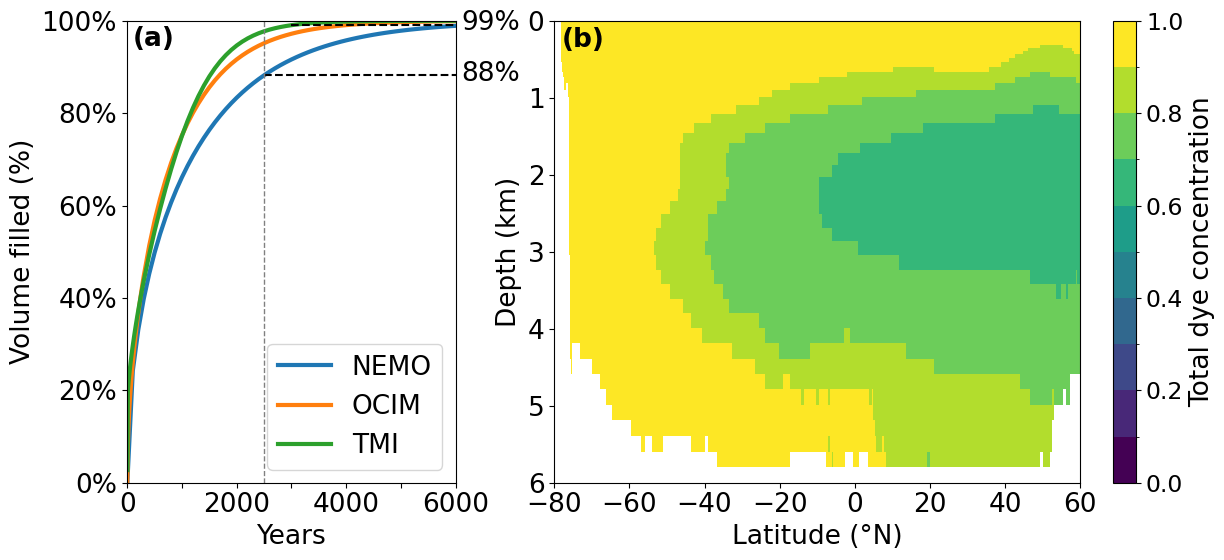

In [62]:
fig = plt.figure(figsize = (14, 6))
gs = fig.add_gridspec(1, 2, width_ratios = [0.5, 1]); font = 19

ax = fig.add_subplot(gs[0, 0])
ax.plot(l_age, l_volume_filled_NEMO, label = 'NEMO', linewidth = 3)
ax.plot(transient_dyes_ocim['years'].values, l_volume_filled_OCIM, label = 'OCIM', linewidth = 3)
ax.plot(years, l_volume_filled_TMI, label = 'TMI', linewidth = 3)
ax.axhline(xmin = 2500/6000, y = 0.8816, ls = '--', color = 'black'); ax.text(6100, 0.87, '88%', fontsize = font)
ax.axhline(xmin = 3000/6000, y = 0.99, ls = '--', color = 'black'); ax.text(6100, 0.98, '99%', fontsize = font)
ax.axvline(x = 2500, ls = '--', color = 'grey', linewidth = 1)
ax.legend(fontsize = font)

ax.set_ylim(0, 1); ax.set_yticks([0.2*i for i in range(6)]); ax.set_yticklabels([str(20*i) + '%' for i in range(6)], fontsize = font); ax.set_ylabel('Volume filled (%)', fontsize = font)
ax.set_xlim(-10, 6000); ax.set_xticks([1000*i for i in range(7)]); ax.set_xticklabels(['0', '', '2000', '', '4000', '', '6000'], fontsize = font); ax.set_xlabel('Years', fontsize = font)

ax.text(100, 0.945, '(a)', fontsize = font, fontweight = 'bold')

ax = fig.add_subplot(gs[0, 1])

norm_dyes = uf.get_BoundNorm(0, 1, nbins=10)
lats_avg = uf.get_lats_avg(new_nav_lat, mask_NEMO_Pac)
pco = ax.pcolormesh(lats_avg, l_depth, np.nanmean(np.where(mask_NEMO_Pac, transient_nemo_frac['dyeTot'][52], np.nan), axis = 2), cmap = 'viridis', antialiased=False, norm = norm_dyes)
uf.plot_details_axis(ax, pco, cb = True, cbarlabel = 'Total dye concentration', xlim = (-80, 60), xticks = [-80 + i * 20 for i in range(8)], font = font)
ax.text(-78, 340, '(b)', fontsize = font, fontweight = 'bold'); ax.set_xlabel('Latitude (°N)', fontsize = font)

plt.savefig(fig_path + 'timeseries_volume_REF_vs_TMI_SZ_2500.png', bbox_inches='tight')

In [72]:
y2 = 100
year100 = uf.extract_year(TMI_2deg_timeseries, y2, fields = ['dyeTot', 'dyeAA', 'dyeHS', 'dyeNA'])

In [ ]:
year100['dyeTot_quasi'] = year100['dyeTot'] - year100['dyeNA']

In [ ]:
ds_year100 = transient_nemo_frac.isel(Time = 10)

In [70]:
def plot_AA_HS_limit(ax, linewidth = 2):
    ax.plot([0, 178], [-62.5, -62.5], linewidth = linewidth, color = 'red')
    ax.plot([178, 292], [-68.5, -68.5], linewidth = linewidth, color = 'red')
    ax.plot([292, 435], [-62.5, -62.5], linewidth = linewidth, color = 'red')
    ax.plot([178, 178], [-68.5, -62.5], linewidth = linewidth, color = 'red')
    ax.plot([292, 292], [-68.5, -62.5], linewidth = linewidth, color = 'red')

In [73]:
l_years_ocim = list(transient_dyes_ocim['years']); iyear_ocim = l_years_ocim.index(100)
transient_dyes_ocim['dyeTot_quasi'] = transient_dyes_ocim['dyeTot'] - transient_dyes_ocim['dyeNA'] 

year100['dyeTot_quasi'] = year100['dyeTot'] - year100['dyeNA']

In [74]:
ilon_TMI = uf.approx_depth(73, l_lon_TMI)[1]; ilon_ocim = uf.approx_depth(73, l_lon_ocim)[1]
ocim_dyetot = np.empty((48, 91, 180)); TMI_dyetot = np.empty((33, 90, 180))
l_lon_plot_ocim = np.empty((91, 180)); l_lon_plot_TMI = np.empty((90, 180))

ocim_dyetot[:, :, 0:(180 - ilon_ocim)] = transient_dyes_ocim['dyeTot_quasi'].values[iyear_ocim, :, :, ilon_ocim:]; l_lon_plot_ocim[:, :(180 - ilon_ocim)] = l_lon_ocim3D[:, ilon_ocim:]
ocim_dyetot[:, :, (180 - ilon_ocim):] = transient_dyes_ocim['dyeTot_quasi'].values[iyear_ocim, :, :, :ilon_ocim]; l_lon_plot_ocim[:, (180 - ilon_ocim):] = l_lon_ocim3D[:, :ilon_ocim] + 360

TMI_dyetot[:, :, 0:(180 - ilon_TMI)] = year100['dyeTot_quasi'].values[:, :, ilon_TMI:]; l_lon_plot_TMI[:, :(180 - ilon_TMI)] = l_lon_TMI3D[:, ilon_TMI:]
TMI_dyetot[:, :, (180 - ilon_TMI):] = year100['dyeTot_quasi'].values[:, :, :ilon_TMI]; l_lon_plot_TMI[:, (180 - ilon_TMI):] = l_lon_TMI3D[:, :ilon_TMI] + 360

In [75]:
idepth1, idepth2 = uf.approx_depth(300, l_depth_ocim)[1], uf.approx_depth(1000, l_depth_ocim)[1]

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:155: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(nav_lon, nav_lat, array_to_plot[idepth], antialiased = False, norm = norm, cmap = cmapname)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:155: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(nav_lon, nav_lat, array_to_plot[idepth], antialiased = False, norm = norm, cmap = cmapname

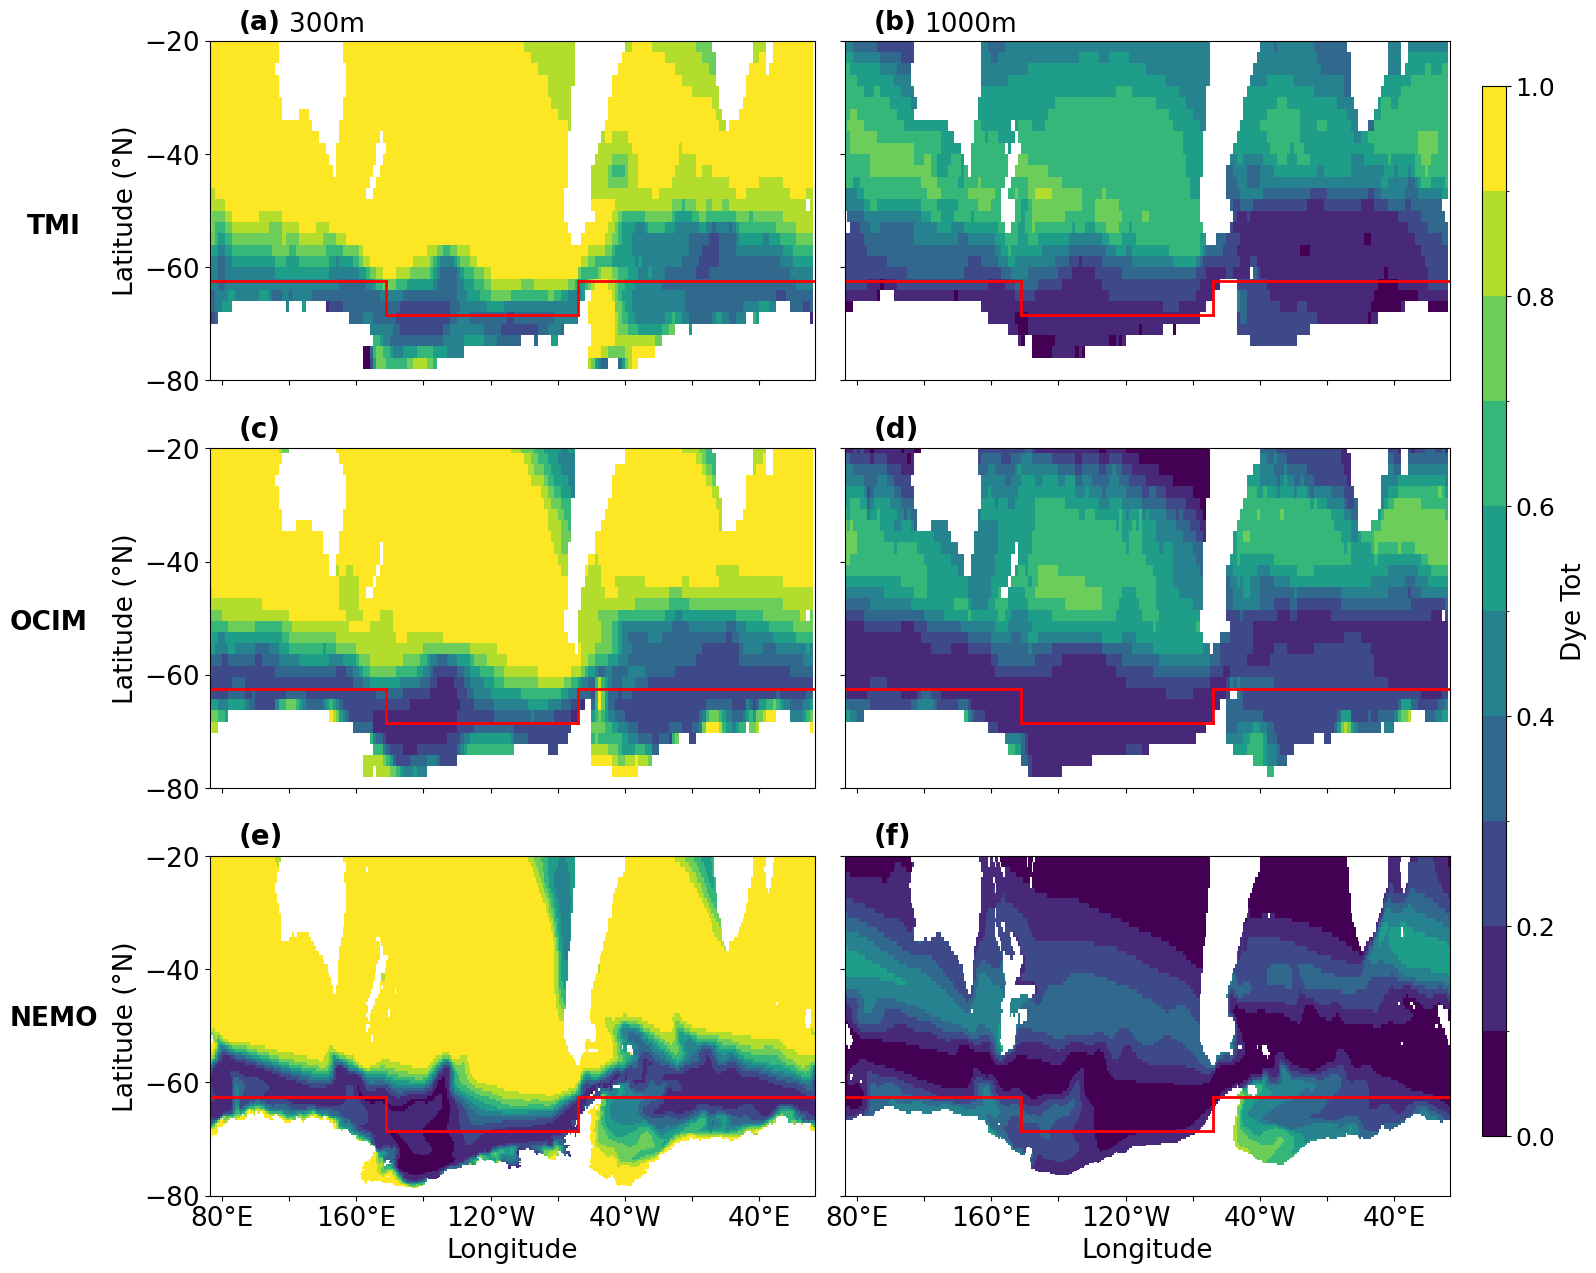

In [77]:
fig = plt.figure(figsize = (16, 15))
gs = fig.add_gridspec(3, 2, wspace=0.05, hspace=0.2); font = 19; linewidth = 2
xlim = (73, 433); ylim = (-80, -20); l_idepth = [34, 48]; l_idepth_TMI = [11, 18]; l_idepth_ocim = [idepth1, idepth2]
norm = uf.get_BoundNorm(0, 1)

for i in range(2):
    ylabels = False; idepth = i%2
    if i == 0: ylabels = True
    
    ax = fig.add_subplot(gs[0, i])
    pco = ax.pcolormesh(l_lon_plot_TMI, l_lat_TMI3D, TMI_dyetot[l_idepth_TMI[idepth]], norm = norm)
    uf.plot_details_axis(ax, pco, cb = False, font = font, xlim = xlim, ylim = ylim, xlabels = False, ylabels = ylabels, yticks = [-80 + i*20 for i in range(5)])
    plot_AA_HS_limit(ax)
    ax.text(90, -18, uf.panels_letter_parenthesis[i], fontsize = font, fontweight = 'bold')
    if ylabels: ax.set_ylabel('Latitude (°N)', fontsize = font)
    ax.set_xticks([80 + 40 * i for i in range(9)]); ax.set_xticklabels([])
    
    ax = fig.add_subplot(gs[1, i])
    pco = ax.pcolormesh(l_lon_plot_ocim, l_lat_ocim3D, ocim_dyetot[l_idepth_ocim[idepth]], norm = norm)
    uf.plot_details_axis(ax, pco, cb = False, font = font, xlim = xlim, ylim = ylim, xlabels = False, ylabels = ylabels, yticks = [-80 + i*20 for i in range(5)])
    plot_AA_HS_limit(ax)
    if ylabels: ax.set_ylabel('Latitude (°N)', fontsize = font)
    ax.text(120, 53.7, str(int(l_depth_TMI[l_idepth_TMI[idepth]])) + 'm', fontsize = font)
    ax.text(90, -18, uf.panels_letter_parenthesis[i + 2], fontsize = font + 1, fontweight = 'bold')
    ax.set_xticks([80 + 40 * i for i in range(9)]); ax.set_xticklabels([])
        
    ax = fig.add_subplot(gs[2, i])
    pco = uf.plot_dye_depthlvl(ax, ds_year100, 'dyeTot_quasi', new_nav_lat, new_nav_lon, idepth = l_idepth[idepth], cb = False, fontsize = font,
                         xlim = xlim, ylim = ylim, ylabels = ylabels, yticks = [-80 + i*20 for i in range(5)])
    plot_AA_HS_limit(ax)
    if ylabels: ax.set_ylabel('Latitude (°N)', fontsize = font)
    ax.set_xlabel('Longitude', fontsize = font)
    ax.text(90, -18, uf.panels_letter_parenthesis[i + 4], fontsize = font + 1, fontweight = 'bold')
    ax.set_xticks([80 + 40 * i for i in range(9)]); ax.set_xticklabels(['80°E', '', '160°E', '', '120°W', '', '40°W', '', '40°E'], fontsize = font)

ax.text(-424, -50, 'NEMO', fontsize = font, fontweight = 'bold')
ax.text(-424, 20, 'OCIM', fontsize = font, fontweight = 'bold')
ax.text(-414, 90, 'TMI', fontsize = font, fontweight = 'bold')
uf.add_cbar(fig, pco, x = 0.92, label = 'Dye Tot', fontsize = font, y = 0.15, height = 0.7, width = 0.015)
save_meter_title = '300_1000'
for idepth_TMI in l_idepth_TMI: save_meter_title += str(int(l_depth_TMI[idepth_TMI])) + '_'

plt.savefig(fig_path + 'dyeTot_TMI_vs_REF_OCIM_y' + str(y2) + '_' + save_meter_title + 'm.png', bbox_inches = 'tight',)

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:120: RuntimeWarning: Mean of empty slice
  array_to_plot = np.nanmean(np.where(np.tile(mask, (len(list(l_depth)), 1, 1)), ds_averaged[field], np.nan), axis=2)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)


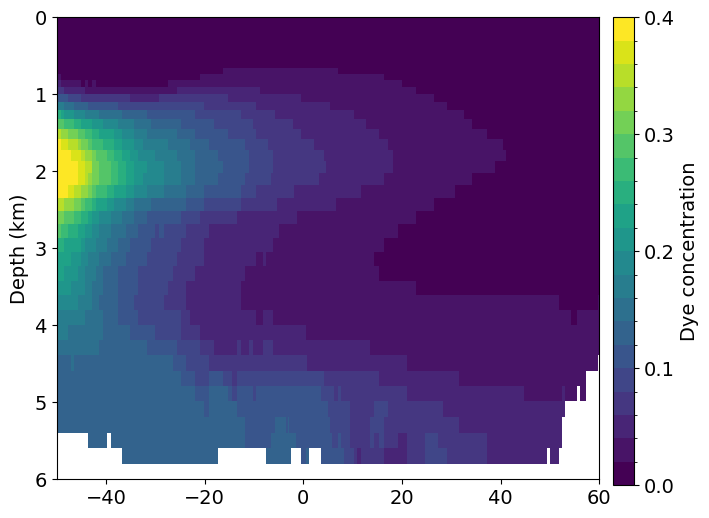

In [82]:
fig = plt.figure(figsize = (7, 6)); font = 14; ax = plt.gca()

pco = uf.plot_Pac_mean(ax, transient_nemo_frac.isel(Time = 35), 'dyeNA', l_depth, mask_NEMO_Pac, new_nav_lat, font = font, cb = False, 
                       xlim = (-50, 60), xticks = [-80 + i * 20 for i in range(8)], vmax = 0.4, nbins = 20)
uf.add_cbar(fig, pco[0], x = 0.92, label = 'Dye concentration', fontsize = font, ticks = [0.1 * i for i in range(5)], width = 0.03, height = 0.78)

plt.savefig(fig_path + 'DyeNA_800y.png', bbox_inches = 'tight')

# Sensitivity experiments

In [124]:
dsClim = xr.open_dataset(data_path + "basin_masks.nc")
l_lat_clim = dsClim['lat'].values; l_lon_clim = dsClim['lon'].values; l_depth0 = uf.create_l_depth()
mask_clim = dsClim['basin_masks'].values

In [150]:
mask_ocim_Pac = uf.optimized_mask_Pac_creation(l_lat_ocim3D, l_lon_ocim3D, 180, 91, l_lat_clim, l_lon_clim, mask_clim)

In [143]:
mask_NEMO_Pac = uf.optimized_mask_Pac_creation(new_nav_lat, new_nav_lon, n_x, n_y, dsClim['lat'].values, dsClim['lon'].values, dsClim['basin_masks'].values)
lats_avg = uf.get_lats_avg(new_nav_lat, mask_NEMO_Pac)

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)


## Get the 2D arrays for the figure

Here we only exctract the arrays that we need for the figures. If you would like to have access to the full outputs, please email me at bruno-millet@hotmail.com

In [125]:
nemo_frac = xr.open_dataset(data_path + 'NEMO_water_fractions.nc')
l_depth = nemo_frac['zt'].values
new_nav_lat, new_nav_lon = uf.get_new_nav_lat_lon(data_path); n_y, n_x = np.shape(new_nav_lat)

l_extrapolated_dyes = [uf.get_extrapolated_dyes(simu) for simu in uf.simus]

In [145]:
l_extrapolated_age = [uf.get_extrapolated_age(simu) for simu in uf.simus]
l_extrapolated_age_da = [xr.DataArray(extrapolated_age, dims=('deptht', 'y', 'x'), name='extrapolated_age') for extrapolated_age in l_extrapolated_age]
l_age = [xr.open_dataset(r'D:/Data/NEMO/' + simu + '/averaged/' + uf.filename(3000, card = simu) + '_averaged.nc') for simu in uf.simus]
for i in range(len(l_age)): l_age[i]['extrapolated_age'] = l_extrapolated_age_da[i]

In [153]:
sensitivity_ZM_dataset = xr.Dataset(
    data_vars={
        'dyeNA_ZMPac_REF': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm21ah21')][idye], np.nan), axis = 2)),
        'dyeNA_ZMPac_ISO3D': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm21ahgr')][idye], np.nan), axis = 2)),
        'dyeNA_ZMPac_DIAHIGH': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm22ah21')][idye], np.nan), axis = 2)),
        'dyeNA_ZMPac_DIALOW': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm20ah21')][idye], np.nan), axis = 2)),
        'dyeNA_ZMPac_ISOCST': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm21ah20')][idye], np.nan), axis = 2)),

        'age_ZMPac_REF': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_age[uf.simus.index('tm21ah21')]['extrapolated_age'], np.nan), axis = 2)),
        'age_ZMPac_ISO3D': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_age[uf.simus.index('tm21ahgr')]['extrapolated_age'], np.nan), axis = 2)),
        'age_ZMPac_DIAHIGH': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_age[uf.simus.index('tm22ah21')]['extrapolated_age'], np.nan), axis = 2)),
        'age_ZMPac_DIALOW': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_age[uf.simus.index('tm20ah21')]['extrapolated_age'], np.nan), axis = 2)),
        'age_ZMPac_ISOCST': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_age[uf.simus.index('tm21ah20')]['extrapolated_age'], np.nan), axis = 2)),

        'dyeNP_ZMPac_REF': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm21ah21')][uf.dyes.index('dyeNP')], np.nan), axis = 2)),
        'dyeHS_ZMPac_REF': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm21ah21')][uf.dyes.index('dyeHS')], np.nan), axis = 2)),
        'dyeAA_ZMPac_REF': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm21ah21')][uf.dyes.index('dyeAA')], np.nan), axis = 2)),

        'dyeNP_ZMPac_DIAHIGH': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm22ah21')][uf.dyes.index('dyeNP')], np.nan), axis = 2)),
        'dyeHS_ZMPac_DIAHIGH': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm22ah21')][uf.dyes.index('dyeHS')], np.nan), axis = 2)),
        'dyeAA_ZMPac_DIAHIGH': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm22ah21')][uf.dyes.index('dyeAA')], np.nan), axis = 2)),

        'dyeNP_ZMPac_DIALOW': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm20ah21')][uf.dyes.index('dyeNP')], np.nan), axis = 2)),
        'dyeHS_ZMPac_DIALOW': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm20ah21')][uf.dyes.index('dyeHS')], np.nan), axis = 2)),
        'dyeAA_ZMPac_DIALOW': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm20ah21')][uf.dyes.index('dyeAA')], np.nan), axis = 2)),
    }, 
    coords={
        'depth': l_depth,
        'y': lats_avg,
    }
)

C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\319113029.py:3: RuntimeWarning: Mean of empty slice
  'dyeNA_ZMPac_REF': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm21ah21')][idye], np.nan), axis = 2)),
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\319113029.py:4: RuntimeWarning: Mean of empty slice
  'dyeNA_ZMPac_ISO3D': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm21ahgr')][idye], np.nan), axis = 2)),
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\319113029.py:5: RuntimeWarning: Mean of empty slice
  'dyeNA_ZMPac_DIAHIGH': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm22ah21')][idye], np.nan), axis = 2)),
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\319113029.py:6: RuntimeWarning: Mean of empty slice
  'dyeNA_ZMPac_DIALOW': (['depth', 'y'], np.nanmean(np.where(mask_NEMO_Pac, l_extrapolated_dyes[uf.simus.index('tm20ah21')][idy

In [154]:
sensitivity_ZM_dataset.to_netcdf(data_path + 'sensitivity_ZM_dataset.nc')

In [174]:
l_ds_averaged = [xr.open_dataset(r'D:/Data/NEMO/' + simu + '/averaged/'+ uf.filename(3000, card = simu) +'_averaged.nc') for simu in uf.simus]
for i in range(5):
    extrapolated_age = uf.get_extrapolated_age(uf.simus[i])
    extrapolated_age_da = xr.DataArray(extrapolated_age, dims=('deptht', 'y', 'x'), name='extrapolated_age')
    l_ds_averaged[i] = l_ds_averaged[i].assign(extrapolated_age = extrapolated_age_da)

In [175]:
l_diff_age = []
for i in range(4):
    extrapolated_age_da = xr.DataArray(l_ds_averaged[i+1]['extrapolated_age'] - l_ds_averaged[0]['extrapolated_age'], dims=('deptht', 'y', 'x'), name='extrapolated_age_diff_tm21ah21_' + uf.simus[i+1])
    l_diff_age.append(extrapolated_age_da)

In [176]:
l_ds_averaged[0] = l_ds_averaged[0].assign(extrapolated_age_tm22 = l_ds_averaged[0]['extrapolated_age'] - 2 * l_diff_age[0])
lats_avg = uf.get_lats_avg(new_nav_lat, mask_NEMO_Pac)

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)


In [178]:
uf.simus

['tm21ah21', 'tm20ah21', 'tm21ah20', 'tm21ahgr', 'tm22ah21']

In [185]:
l_ds_averaged[0]['extrapolated_age'].isel(deptht = 53).values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(331, 360), dtype=float32)

In [186]:
sensitivity_age1945m_dataset = xr.Dataset(
    data_vars={
        'age_1945m_REF': (['y', 'x'], l_ds_averaged[0]['extrapolated_age'].isel(deptht = 53).values),
        'age_1945m_ISO3D': (['y', 'x'], l_ds_averaged[3]['extrapolated_age'].isel(deptht = 53).values),
        'age_1945m_DIAHIGH': (['y', 'x'], l_ds_averaged[4]['extrapolated_age'].isel(deptht = 53).values),
        'age_1945m_DIALOW': (['y', 'x'], l_ds_averaged[1]['extrapolated_age'].isel(deptht = 53).values),
        'age_1945m_ISOCST': (['y', 'x'], l_ds_averaged[2]['extrapolated_age'].isel(deptht = 53).values),

        'new_nav_lat': (['y', 'x'], new_nav_lat),
        'new_nav_lon': (['y', 'x'], new_nav_lon),
    }, 
    coords={
        'x': ds_averaged['x'].values,
        'y': ds_averaged['y'].values,
    }
)

In [188]:
sensitivity_age1945m_dataset.to_netcdf(data_path + 'sensitivity_age1945m_dataset.nc')

## Plots

In [189]:
sensitivity_ZM_dataset = xr.open_dataset(data_path + 'sensitivity_ZM_dataset.nc')
sensitivity_age1945m_dataset = xr.open_dataset(data_path + 'sensitivity_age1945m_dataset.nc')

In [157]:
print(l_depth[50:57])
mask_50S = (lats_avg <= -49.5) & (lats_avg >= -50.5)
mask_40N = (lats_avg <= 40.5) & (lats_avg >= 39.5)

[1516.36364746 1652.56848145 1795.67077637 1945.29553223 2101.02661133
 2262.42163086 2429.02514648]


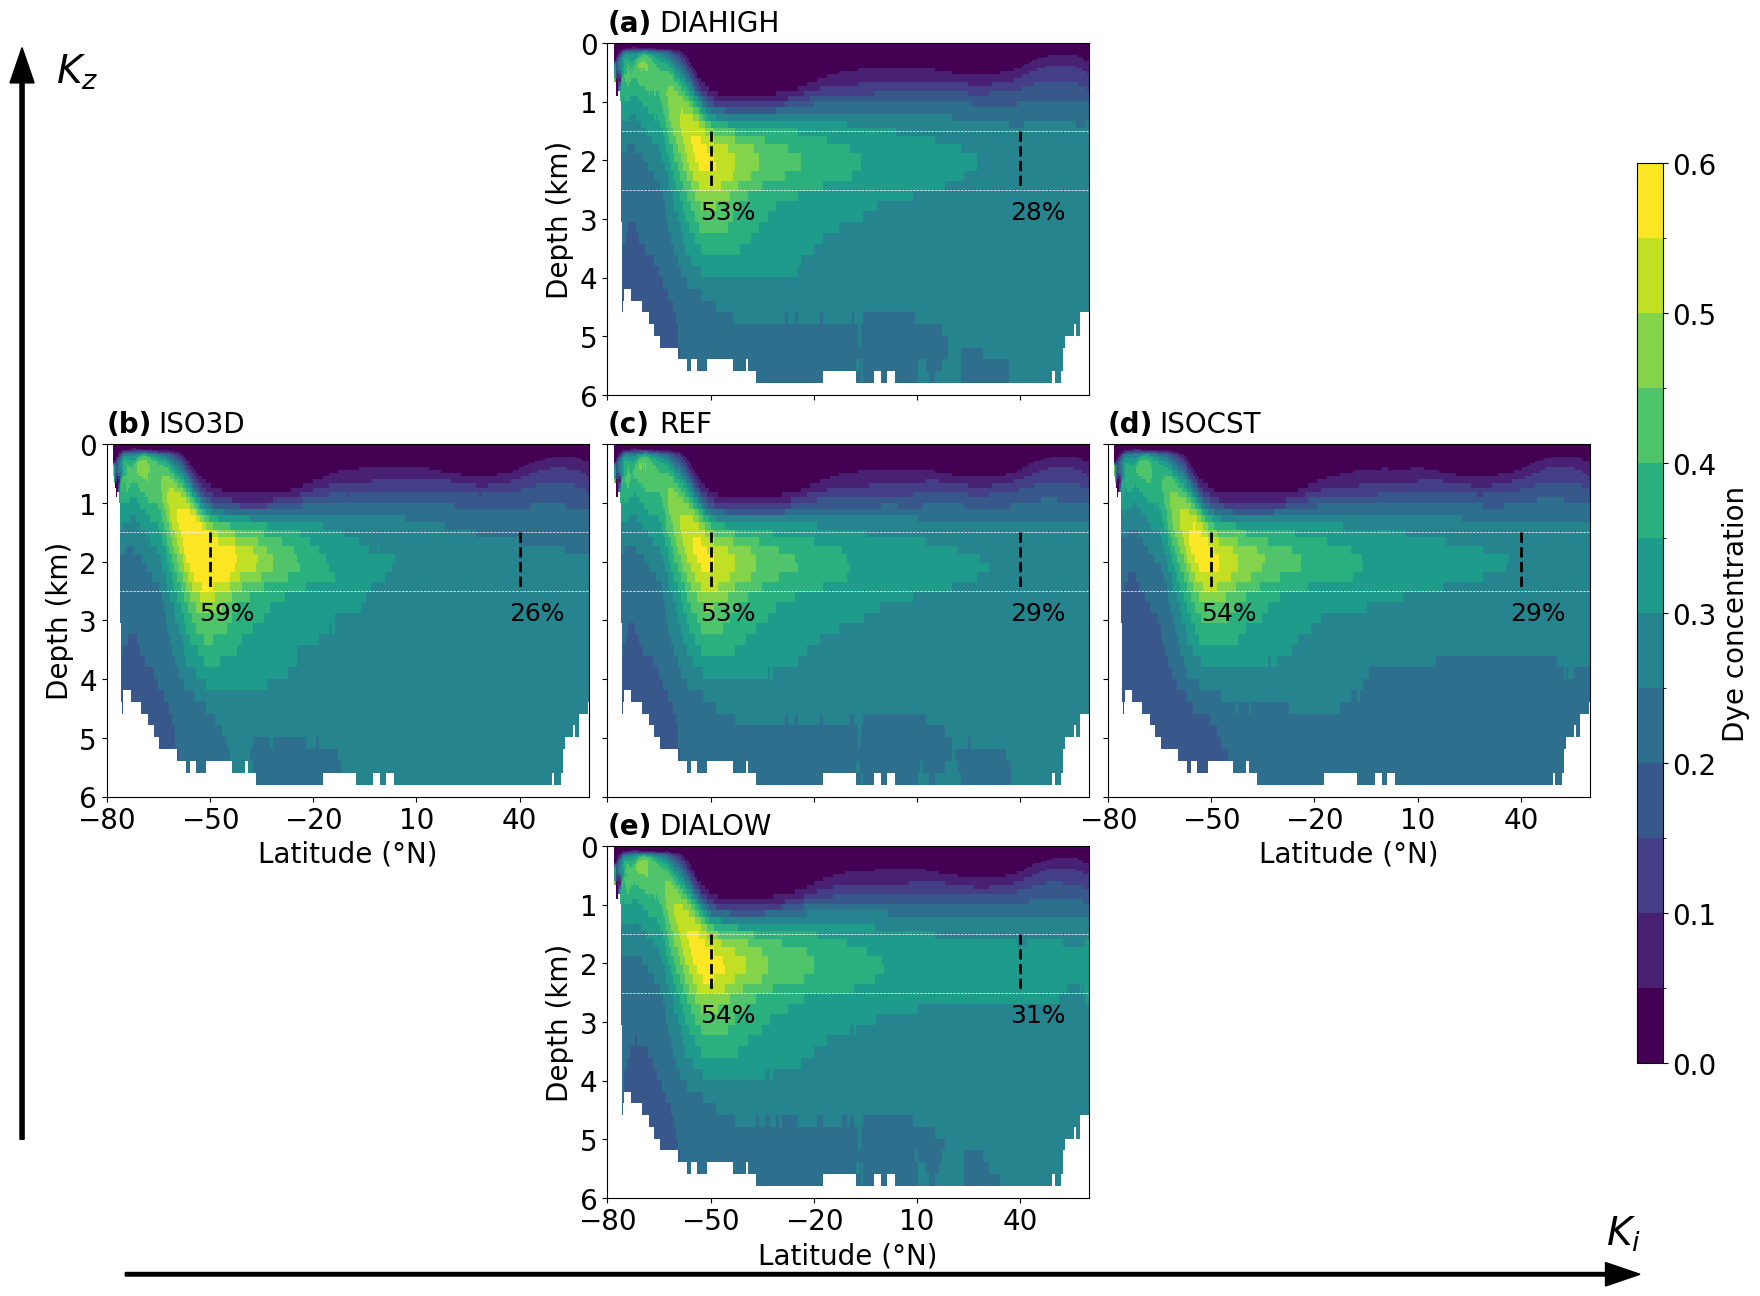

In [162]:
fig = plt.figure(figsize = (20, 15))
gs = fig.add_gridspec(3, 4, width_ratios = [1, 1, 1, 0.1], wspace=0.05, hspace=0.14)
idye = uf.l_patches2.index('NA'); font = 20; norm = uf.get_BoundNorm(0, 0.6, cmapname = 'viridis', nbins = 12)


ax = fig.add_subplot(gs[0, 1]); xlabels, ylabels = False, True
pco = ax.pcolormesh(lats_avg, l_depth, sensitivity_ZM_dataset['dyeNA_ZMPac_DIAHIGH'], norm = norm)
ax.axhline(y = 1500, ls = '--', color = 'white', linewidth = .5); ax.axhline(y = 2500, ls = '--', color = 'white', linewidth = .5)
uf.plot_details_axis(ax, pco, cb = False, xlim = (-80, 60), ylim = (6000, 0), font = font, xlabels = xlabels, ylabels = ylabels, xticks = [-80 + 30*i for i in range(5)])
ax.text(-80, -200, '(a)', fontsize = font, fontweight = 'bold'); ax.text(-65, -200, 'DIAHIGH', fontsize = font)
ax.plot([-50, -50], [1500, 2500], ls = '--', color = 'BLACK', linewidth = 2)
ax.plot([40, 40], [1500, 2500], ls = '--', color = 'BLACK', linewidth = 2)
ax.text(-53,  3000, str(round(np.nanmean(np.where(mask_50S, sensitivity_ZM_dataset['dyeNA_ZMPac_DIAHIGH'][50:57], np.nan))*100)) + '%', color = 'black', fontsize = font - 2)
ax.text(37,  3000, str(round(np.nanmean(np.where(mask_40N, sensitivity_ZM_dataset['dyeNA_ZMPac_DIAHIGH'][50:57], np.nan))*100)) + '%', color = 'black', fontsize = font - 2)

simus_isopyc = ['ISO3D', 'REF', 'ISOCST']
for i in range(3):
    ax = fig.add_subplot(gs[1, i]); xlabels, ylabels = uf.get_xylabels(2, 3, i)
    if i !=1: xlabels = True
    pco = ax.pcolormesh(lats_avg, l_depth, sensitivity_ZM_dataset['dyeNA_ZMPac_' + simus_isopyc[i]], norm = norm)
    ax.axhline(y = 1500, ls = '--', color = 'white', linewidth = .5); ax.axhline(y = 2500, ls = '--', color = 'white', linewidth = .5)
    uf.plot_details_axis(ax, pco, cb = False, xlim = (-80, 60), ylim = (6000, 0), font = font, xlabels = xlabels, ylabels = ylabels, xticks = [-80 + 30*i for i in range(5)])
    ax.text(-80, -200, uf.panels_letter_parenthesis[i + 1], fontsize = font, fontweight = 'bold'); ax.text(-65, -200, simus_isopyc[i], fontsize = font)
    ax.plot([-50, -50], [1500, 2500], ls = '--', color = 'BLACK', linewidth = 2)
    ax.plot([40, 40], [1500, 2500], ls = '--', color = 'BLACK', linewidth = 2)
    ax.text(-53,  3000, str(round(np.nanmean(np.where(mask_50S, sensitivity_ZM_dataset['dyeNA_ZMPac_' + simus_isopyc[i]][50:57], np.nan))*100)) + '%', color = 'black', fontsize = font - 2)
    ax.text(37,  3000, str(round(np.nanmean(np.where(mask_40N, sensitivity_ZM_dataset['dyeNA_ZMPac_' + simus_isopyc[i]][50:57], np.nan))*100)) + '%', color = 'black', fontsize = font - 2)

ax = fig.add_subplot(gs[2, 1]); xlabels, ylabels = True, True
pco = ax.pcolormesh(lats_avg, l_depth, sensitivity_ZM_dataset['dyeNA_ZMPac_DIALOW'], norm = norm)
ax.axhline(y = 1500, ls = '--', color = 'white', linewidth = .5); ax.axhline(y = 2500, ls = '--', color = 'white', linewidth = .5)
uf.plot_details_axis(ax, pco, cb = False, xlim = (-80, 60), ylim = (6000, 0), font = font, xlabels = xlabels, ylabels = ylabels, xticks = [-80 + 30*i for i in range(5)])
ax.text(-80, -200, uf.panels_letter_parenthesis[4], fontsize = font, fontweight = 'bold'); ax.text(-65, -200, 'DIALOW', fontsize = font)
ax.plot([-50, -50], [1500, 2500], ls = '--', color = 'BLACK', linewidth = 2)
ax.plot([40, 40], [1500, 2500], ls = '--', color = 'BLACK', linewidth = 2)
ax.text(-53,  3000, str(round(np.nanmean(np.where(mask_50S, sensitivity_ZM_dataset['dyeNA_ZMPac_DIALOW'][50:57], np.nan))*100)) + '%', color = 'black', fontsize = font - 2)
ax.text(37,  3000, str(round(np.nanmean(np.where(mask_40N, sensitivity_ZM_dataset['dyeNA_ZMPac_DIALOW'][50:57], np.nan))*100)) + '%', color = 'black', fontsize = font - 2)

uf.add_cbar(fig, pco, label = 'Dye concentration', fontsize = font, ticks = [0.1 * i for i in range(7)], x = 0.89, height = 0.6, y = 0.2, width = 0.013)
ax.arrow(-220, 7300, 430, 0, width = 60, clip_on = False, head_width = 400, head_length = 10, fill = True, color = 'black'); ax.text(210, 6800, '$K_{i}$', fontsize = font + 8, fontweight = 'bold')
ax.arrow(-250, 5000, 0, -18000, width = 1.2, clip_on = False, head_width = 7, head_length = 600, fill = True, color = 'black'); ax.text(-240, -13000, '$K_z$', fontsize = font + 8, fontweight = 'bold')

plt.savefig(fig_path + 'NA_5simulations_equilibrium_CNA.png', bbox_inches = 'tight')

In [163]:
import matplotlib.patheffects as pe  # Import path effects

c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:120: RuntimeWarning: Mean of empty slice
  array_to_plot = np.nanmean(np.where(np.tile(mask, (len(list(l_depth)), 1, 1)), ds_averaged[field], np.nan), axis=2)
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:201: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask, nav_lat, np.nan), axis = 1)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\647886242.py:19: RuntimeWarning: Mean of empty slice
  contours = ax.contour(l_lat_ocim, l_depth_ocim, np.nanmean(np.where(mask_ocim_Pac, ocim_frac['ideal_age'], np.nan), axis = 2), levels = [int(500 * (i+1)) for i in range(6)], linewidths = 2, colors = 'grey')
c:\Users\bm25v947\OneDrive - Universitaet Bern\Documents\Thèse LSCE\GitHub\dyes-evaluation_ventilation\scripts\usefull_functions.py:134: UserWarning: Addi

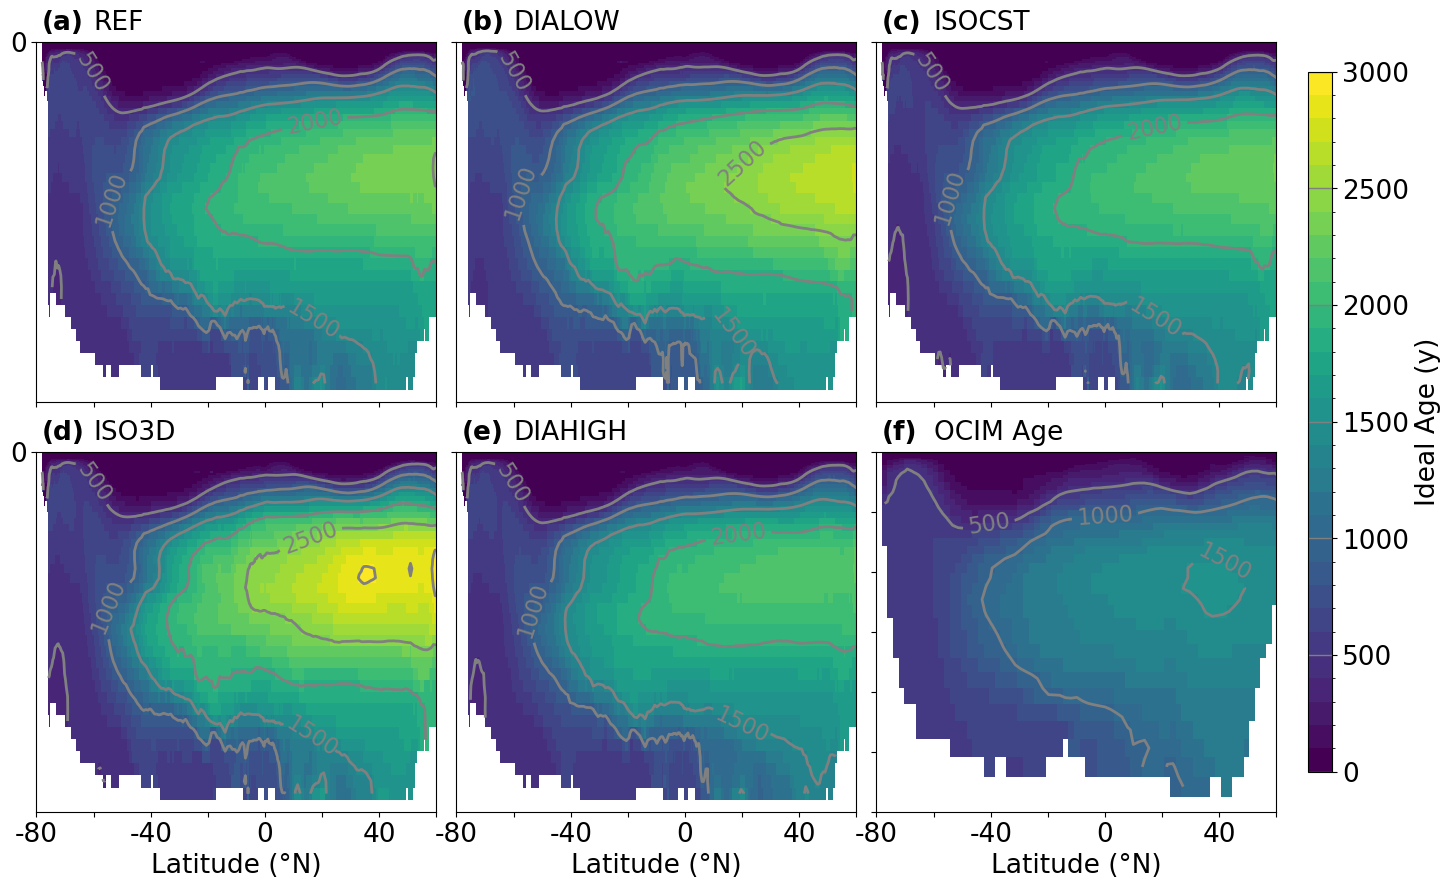

In [170]:
fig = plt.figure(figsize = (16, 10))
gs = fig.add_gridspec(2, 3, wspace=0.05, hspace=0.14)
font = 19
norm = uf.get_BoundNorm(100, 3100, nbins = 31)

for i, simu in enumerate(['REF', 'DIALOW', 'ISOCST', 'ISO3D', 'DIAHIGH']):
    i_ligne, i_col = i//3, i%3; ax = fig.add_subplot(gs[i_ligne, i_col]); xlabel, ylabel = uf.get_xylabels(2, 3, i)
    pco = ax.pcolormesh(lats_avg, l_depth, sensitivity_ZM_dataset['age_ZMPac_' + simu], cmap = 'viridis', norm = norm, antialiased=False)
    uf.plot_details_axis(ax, pco, cb = False, xlim = (-80, 60), ylim = (6000, 0), font = font, xlabels = xlabel, ylabels = ylabel,
                            xticks = [-80 + i * 20 for i in range(8)], yticks = [-80 + i * 20 for i in range(5)])
    ax.text(-78, -200, uf.panels_letter_parenthesis[i], fontsize = font, fontweight = 'bold'); ax.text(-60, -200, uf.simu_labels[i], fontsize = font)
    if xlabel: ax.set_xticklabels(['-80', '', '-40', '', '0', '', '40', ''], fontsize = font); ax.set_xlabel('Latitude (°N)', fontsize = font)
    contours = ax.contour(lats_avg, l_depth, sensitivity_ZM_dataset['age_ZMPac_' + simu], levels = [int(500 * (i+1)) for i in range(6)], colors = 'grey', linewidths = 2)
    ax.clabel(contours, inline=True, fontsize=font - 3, manual=[(-60, 500), (-60, 2500), (20, 4500), (20, 2000)])

ax = fig.add_subplot(gs[1, 2])
uf.plot_Pac_mean(ax, ocim_frac, 'ideal_age', l_depth_ocim, mask_ocim_Pac, l_lat_ocim3D, vmin = 0, vmax = 3000, nbins = 31, cb = False, xlabels = True, ylabels = False, 
                  xlim = (-80, 60), font = font, xticks = [-80 + i * 20 for i in range(8)])
contours = ax.contour(l_lat_ocim, l_depth_ocim, np.nanmean(np.where(mask_ocim_Pac, ocim_frac['ideal_age'], np.nan), axis = 2), levels = [int(500 * (i+1)) for i in range(6)], linewidths = 2, colors = 'grey')
ax.clabel(contours, inline=True, fontsize=font - 3, manual=[(-40, 1500), (0, 2000), (40, 2000)])

ax.text(-78, -200, uf.panels_letter_parenthesis[5], fontsize = font, fontweight = 'bold'); ax.text(-60, -200, 'OCIM Age', fontsize = font)
ax.set_xticklabels(['-80', '', '-40', '', '0', '', '40', ''], fontsize = font); ax.set_xlabel('Latitude (°N)', fontsize = font)

cbar = uf.add_cbar(fig, r[0], label = 'Ideal Age (y)', x = 0.92, y =0.15, height = 0.7, fontsize = font, ticks = [500 * i for i in range(7)])
for level in [500 * i for i in range(7)]:
    cbar.ax.hlines(level, xmin=0, xmax=1, colors='grey', linewidth=1)

plt.savefig(fig_path + 'ideal_age_3000y_4_sims_vs_modern_extrapolated_V2contours.png', bbox_inches = 'tight')

In [ ]:
ocim_frac['ideal_age2'] = ocim_frac['ideal_age'] * 2

In [ ]:
max_index_flat = np.nanargmax(np.where(mask_NEMO_Pac, l_ds_averaged[i]['extrapolated_age'][53], np.nan))
# Convert the flattened index to 2D coordinates
max_index_2d = np.unravel_index(max_index_flat, l_ds_averaged[i]['extrapolated_age'][53].shape)
print(max_index_2d, new_nav_lon.shape)

(np.int64(236), np.int64(151)) (331, 360)


C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\444113560.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(new_nav_lon, new_nav_lat, sensitivity_age1945m_dataset['age_1945m_' + simu], norm = norm_age, cmap = 'viridis', antialiased=False)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\444113560.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(new_nav_lon, new_nav_lat, sensitivity_age1945m_dataset['age_1945m_' + simu], norm = norm_age, cmap = 'viridis', antialiased=False)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\4

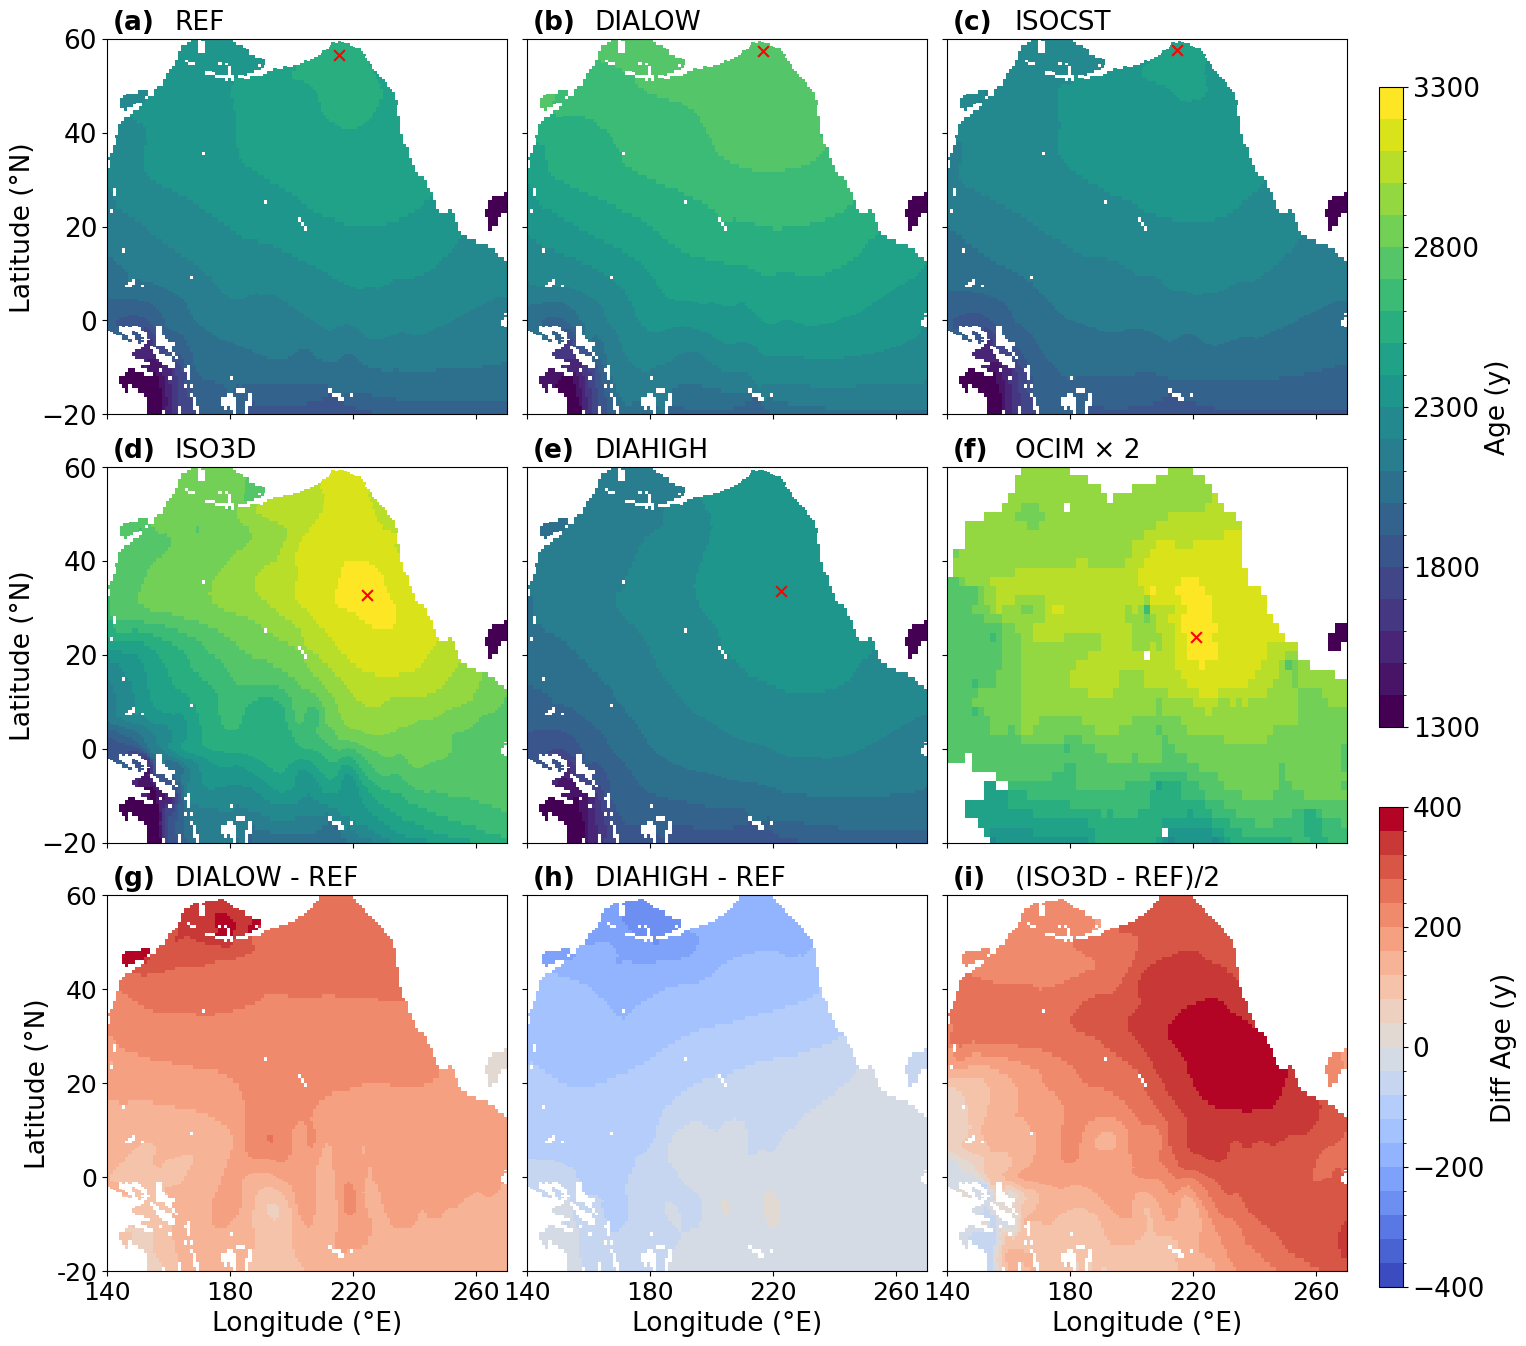

In [ ]:
fig = plt.figure(figsize = (16, 16))
gs = fig.add_gridspec(3, 3, wspace=0.05, hspace=0.14)
idepth = 53; font = 19
vmin, vmax, nbins = 1300, 3300, 20
norm_age = uf.get_BoundNorm(vmin, vmax, nbins = nbins)

for i, simu in enumerate(['REF', 'DIALOW', 'ISOCST', 'ISO3D', 'DIAHIGH']):
    xlabel, ylabel = uf.get_xylabels(3, 3, i); i_line, i_col = i//3, i%3
    ax = fig.add_subplot(gs[i_line, i_col])
    pco = ax.pcolormesh(new_nav_lon, new_nav_lat, sensitivity_age1945m_dataset['age_1945m_' + simu], norm = norm_age, cmap = 'viridis', antialiased=False)
    uf.plot_details_axis(ax, pco, cb = False, xlim = (140, 270), ylim = (-20, 60), font = font, xlabels = xlabel, ylabels = ylabel,
                            xticks = [140 + i * 40 for i in range(6)], yticks = [-20 + i * 20 for i in range(5)])
    if i_col == 0: ax.set_ylabel('Latitude (°N)', fontsize = font)
    ax.text(142, 62, uf.panels_letter_parenthesis[i], fontsize = font, fontweight = 'bold'); ax.text(162, 62, uf.simu_labels[i], fontsize = font)
    max_index_flat = np.nanargmax(np.where(mask_NEMO_Pac, sensitivity_age1945m_dataset['age_1945m_' + simu], np.nan))
    max_index_2d = np.unravel_index(max_index_flat, l_ds_averaged[i]['extrapolated_age'][53].shape)
    ax.scatter(new_nav_lon[max_index_2d], new_nav_lat[max_index_2d], s = 60, c = 'red', marker = 'x')


ax = fig.add_subplot(gs[1, 2])
age = uf.plot_dye_depthlvl(ax, ocim_frac, 'ideal_age2', l_lat_ocim3D, l_lon_ocim3D, idepth = 32, vmin = vmin, vmax = vmax, cb = False, nbins = nbins, xlim = (140, 270), ylim = (-20, 60), fontsize = font - 1, 
                            xlabels = False, ylabels = False, xticks = [140 + i * 40 for i in range(6)])
ax.text(142, 62, uf.panels_letter_parenthesis[5], fontsize = font, fontweight = 'bold'); ax.text(162, 62, 'OCIM × 2 ', fontsize = font)
max_index_flat = np.nanargmax(np.where(mask_ocim_Pac, ocim_frac['ideal_age'][32], np.nan))
max_index_2d = np.unravel_index(max_index_flat, ocim_frac['ideal_age'][32].shape)
ax.scatter(l_lon_ocim3D[max_index_2d], l_lat_ocim3D[max_index_2d], s = 60, c = 'red', marker = 'x')

uf.add_cbar(fig, age, y = 0.45, x = 0.92, height = 0.4, label = 'Age (y)', fontsize = font, ticks = [1300 + 500 * i for i in range(5)])

norm = uf.get_BoundNorm(-400, 400, nbins = 20)
l_diff_labels = ['DIALOW - REF', 'DIAHIGH - REF', '(ISO3D - REF)/2']
for i in range(3):
    if i == 0: ylabels = True
    else: ylabels = False

    ax = fig.add_subplot(gs[2, i%3])
    if i == 0: diff_age = ax.pcolormesh(new_nav_lon[200], lats_avg, l_diff_age[i][idepth], norm = norm, cmap = 'coolwarm') #; contour = ax.contour(new_nav_lon[200], lats_avg, l_diff_age[i][idepth], levels=[-40, 0, 40], colors='black', linestyles='solid', linewidths=2)
    elif i == 1: diff_age = ax.pcolormesh(new_nav_lon[200], lats_avg, l_diff_age[3][idepth], norm = norm, cmap = 'coolwarm') #; contour = ax.contour(new_nav_lon[200], lats_avg, l_diff_age[3][idepth], levels=[-40, 0, 40], colors='black', linestyles='solid', linewidths=2)
    else: diff_age = ax.pcolormesh(new_nav_lon[200], lats_avg, l_diff_age[i][idepth]/2, norm = norm, cmap = 'coolwarm') #; contour = ax.contour(new_nav_lon[200], lats_avg, l_diff_age[i][idepth]/2, levels=[-40, 0, 40], colors='black', linestyles='solid', linewidths=2)
        
    ax.set_xticks([140 + i * 40 for i in range(6)]); ax.set_xticklabels([140 + i * 40 for i in range(6)], fontsize = font - 1)
    if i==0: ax.set_yticks([-20 + i * 20 for i in range(5)]); ax.set_yticklabels([-20 + i * 20 for i in range(5)], fontsize = font - 1); ax.set_ylabel('Latitude (°N)', fontsize = font)
    else: ax.set_yticks([-20 + i * 20 for i in range(5)]); ax.set_yticklabels([])
    ax.set_xlim(140, 270); ax.set_ylim(-20, 60); ax.set_xlabel ('Longitude (°E)', fontsize = font)
    ax.text(142, 62, uf.panels_letter_parenthesis[i + 6], fontsize = font, fontweight = 'bold'); ax.text(162, 62, l_diff_labels[i], fontsize = font)
    

uf.add_cbar(fig, diff_age, x = 0.92, y = 0.1, height = 0.3, label = 'Diff Age (y)', fontsize = font, ticks = [-400 + 200 * i for i in range(5)])
plt.savefig(fig_path + 'age_NP_4sims_Holz_ageDiff.png', bbox_inches = 'tight')

In [171]:
low_ref = [sensitivity_ZM_dataset['dyeNP_ZMPac_DIALOW'] - sensitivity_ZM_dataset['dyeNP_ZMPac_REF'],
           sensitivity_ZM_dataset['dyeHS_ZMPac_DIALOW'] - sensitivity_ZM_dataset['dyeHS_ZMPac_REF'],
           sensitivity_ZM_dataset['dyeAA_ZMPac_DIALOW'] - sensitivity_ZM_dataset['dyeAA_ZMPac_REF']]
high_ref = [sensitivity_ZM_dataset['dyeNP_ZMPac_DIAHIGH'] - sensitivity_ZM_dataset['dyeNP_ZMPac_REF'],
            sensitivity_ZM_dataset['dyeHS_ZMPac_DIAHIGH'] - sensitivity_ZM_dataset['dyeHS_ZMPac_REF'],
            sensitivity_ZM_dataset['dyeAA_ZMPac_DIAHIGH'] - sensitivity_ZM_dataset['dyeAA_ZMPac_REF']]
diffs = [low_ref, high_ref]; label_diffs = ['DIALOW - REF', 'DIAHIGH - REF']

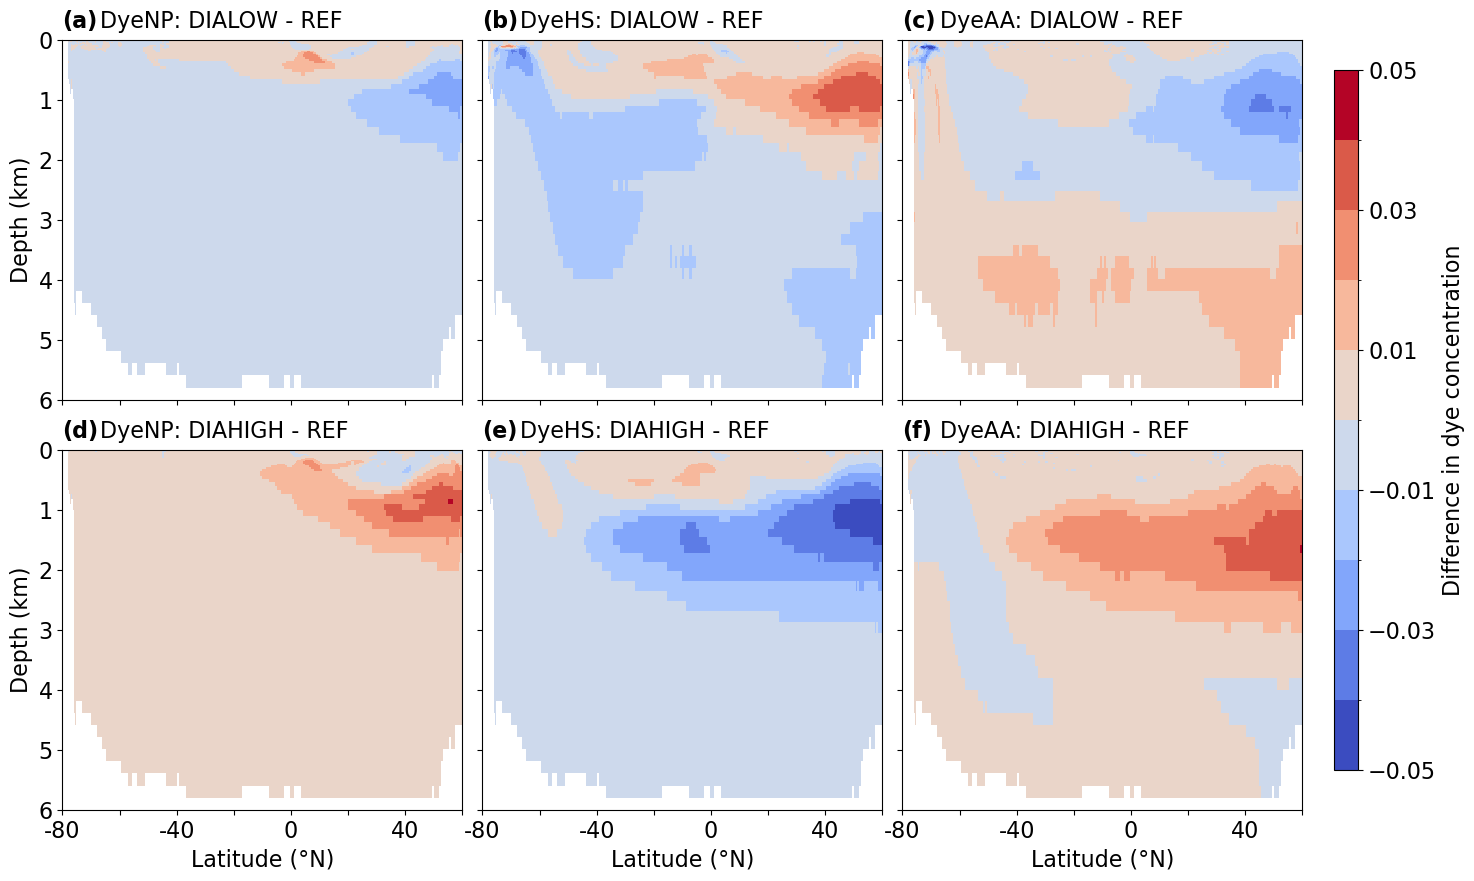

In [173]:
fig = plt.figure(figsize = (16, 10)); gs = fig.add_gridspec(2, 3, wspace=0.05, hspace=0.14)
dyes_plot = ['NP', 'HS', 'AA']; norm_diff = uf.get_BoundNorm(-0.05, 0.05, nbins = 10); font = 16

for i in range(6):
    xlabel, ylabel = uf.get_xylabels(2, 3, i); i_line, i_col = i//3, i%3
    ax = fig.add_subplot(gs[i_line, i_col])    
    pco = ax.pcolormesh(lats_avg, l_depth, diffs[i_line][i_col], norm = norm_diff, cmap = 'coolwarm')
    uf.plot_details_axis(ax, pco, cb = False, font = font, cmapname = 'coolwarm', xlabels = xlabel, ylabels = ylabel, 
                         xlim = (-80, 60), xticks = [-80 + 20 * i for i in range(8)])
    if xlabel: ax.set_xticklabels([-80, '', '-40', '', '0', '', '40', ''], fontsize = font); ax.set_xlabel('Latitude (°N)', fontsize = font)
    else: ax.set_xticklabels([])
    ax.text(-80, -200, uf.panels_letter_parenthesis[i], fontsize = font, fontweight = 'bold')
    ax.text(-67, -200, 'Dye' + dyes_plot[i_col] + ': ' + label_diffs[i_line], fontsize = font)

uf.add_cbar(fig, pco, label = 'Difference in dye concentration', fontsize = font, ticks = [-0.05 + 0.02 * i for i in range(6)], x = 0.92, height = 0.7, y = 0.15, width = 0.015)
plt.savefig(fig_path + 'diff_dye_concentration_DIALOW_DIAHIGH_vsREF.png', bbox_inches = 'tight')

# North Pacific dynamics: comparison to reanalysis

In [103]:
fig_path = root_directory + 'figures/Comparison NEMO vs reconstructions/'
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

## Get the arrays/profiles

In [219]:
u_month = xr.open_dataset(data_path + 'n42tm21d_10020101_10021231_1M_grid_U.nc')
v_month = xr.open_dataset(data_path + 'n42tm21d_10020101_10021231_1M_grid_V.nc')

mask_continents = np.isnan(u_month['tauuo'][0])
new_nav_lat, new_nav_lon = uf.get_new_nav_lat_lon(data_path)

In [220]:
w_averaged = xr.open_dataset(data_path + 'n42tm21d_10020101_10021231_1Y_grid_W.nc').mean('time_counter')

In [221]:
dsClim = xr.open_dataset(data_path + "basin_masks.nc")
l_lat_clim = dsClim['lat'].values; l_lon_clim = dsClim['lon'].values; l_depth0 = uf.create_l_depth()
mask_clim = dsClim['basin_masks'].values

In [222]:
climato_winds = xr.open_dataset(data_path + 'cmems_obs-wind_glo_phy_my_l4_P1M_monthly.nc')
climato_winds_averaged_2013 = climato_winds.mean(dim='time')
l_lat_winds, l_lon_winds = climato_winds_averaged_2013['latitude'].values.copy(), climato_winds_averaged_2013['longitude'].values.copy()

In [223]:
l_lon_plot, e_stress, n_stress, mask_continents_winds = uf.plot_climato_month(climato_winds, l_lat_clim, l_lon_clim, mask_clim)
l_lon_plot2D, l_lat_plot2D = np.meshgrid(l_lon_plot, l_lat_winds)
mask_NP_winds = uf.optimized_mask_Pac_creation(l_lat_plot2D, l_lon_plot2D, 1440, 720, l_lat_clim, l_lon_clim, mask_clim) & (l_lat_plot2D >= 0)
mask_NP_winds_mS = uf.mask_Pac_creation_marginSeas(l_lat_plot2D, l_lon_plot2D, 1440, 720, l_lat_clim, l_lon_clim, mask_clim) & (l_lat_plot2D >= 0)

In [224]:
nav_lon, nav_lat = u_month['nav_lon'].values.copy(), u_month['nav_lat'].values.copy(); l_depth = u_month['depthu'].values
mask_NP = uf.optimized_mask_Pac_creation(nav_lat, nav_lon, 360, 331, l_lat_clim, l_lon_clim, mask_clim) & (nav_lat >= 0)
mask_NP_mS = uf.mask_Pac_creation_marginSeas(nav_lat, nav_lon, 360, 331, l_lat_clim, l_lon_clim, mask_clim) & (nav_lat >= 0)

In [225]:
earth_rotation = 7.292*10**-5
Ekman_y = u_month['tauuo']/(1027 * 2 * earth_rotation * np.sin(np.radians(new_nav_lat))); Ekman_y_winds = e_stress/(1027 * 2 * earth_rotation * np.sin(np.radians(l_lat_plot2D)))
Ekman_x = v_month['tauvo']/(1027 * 2 * earth_rotation * np.sin(np.radians(new_nav_lat))); Ekman_x_winds = n_stress/(1027 * 2 * earth_rotation * np.sin(np.radians(l_lat_plot2D)))

In [226]:
R = uf.earth_rad
lat_rad = np.radians(new_nav_lat); lon_rad = np.radians(new_nav_lon)
dlat = np.diff(lat_rad, axis=0); dlon = np.diff(lon_rad, axis=1)

In [227]:
# lat_mean = np.nanmean(np.where(mask_NP, lat_rad, np.nan), axis = 1)
dy = R * dlat  # Distance in km between points in the latitude direction
dx = R * dlon * np.cos(lat_rad[:, :-1]) # Distance in km between points in the longitude direction
dy = np.pad(dy, ((0, 1), (0, 0)), mode='edge'); dx = np.pad(dx, ((0, 0), (0, 1)), mode='edge')

In [228]:
dlat_clim = np.diff(np.radians(l_lat_plot2D), axis=0); dlon_clim = np.diff(np.radians(l_lon_plot2D), axis=1)
# lat_mean_clim = np.nanmean(np.radians(l_lat_plot2D), axis = 1)
dy_clim = R * dlat_clim
dx_clim = R * dlon_clim * abs(np.cos(np.radians(l_lat_plot2D[:, :-1])))
dy_clim = np.pad(dy_clim, ((0, 1), (0, 0)), mode='edge'); dx_clim = np.pad(dx_clim, ((0, 0), (0, 1)), mode='edge')
area_clim = np.abs(dy_clim * dx_clim)

In [229]:
area_surface = v_month['area'].values

In [ ]:
dEkman_xdx = np.gradient(Ekman_x, axis=2) / dx; dEkman_xdx_winds = np.gradient(Ekman_x_winds, axis=2) / dx_clim
dEkman_ydy = np.gradient(Ekman_y, axis=1) / dy; dEkman_ydy_winds = np.gradient(Ekman_y_winds, axis=1) / dy_clim
W_ekman = dEkman_xdx - dEkman_ydy; W_ekman_winds = dEkman_xdx_winds - dEkman_ydy_winds
W_ekman_daily, W_ekman_winds_daily = W_ekman * 24 * 3600 / 12, W_ekman_winds * 24 * 3600

c:\Users\bm25v947\AppData\Local\anaconda3\envs\jupyNB\Lib\site-packages\numpy\lib\_function_base_impl.py:1286: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
c:\Users\bm25v947\AppData\Local\anaconda3\envs\jupyNB\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
c:\Users\bm25v947\AppData\Local\anaconda3\envs\jupyNB\Lib\site-packages\numpy\lib\_function_base_impl.py:1314: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


In [231]:
climato_velocities_averaged = xr.open_dataset(data_path + 'MEMS_OMEGA3D_velocities_2014_averaged.nc')
l_lat_climato_velo, l_lon_climato_velo, l_depth_climato_velo = climato_velocities_averaged['latitude'].values, climato_velocities_averaged['longitude'].values, climato_velocities_averaged['depth'].values

In [232]:
l_lon_climato_velo2D, l_lat_climato_velo2D = np.meshgrid(l_lon_climato_velo, l_lat_climato_velo)
mask_NP_climato_velo = uf.optimized_mask_Pac_creation(l_lat_climato_velo2D, l_lon_climato_velo2D, 720, 260, l_lat_clim, l_lon_clim, mask_clim)
mask_NP_climato_velo_mS = uf.optimized_mask_Pac_creation(l_lat_climato_velo2D, l_lon_climato_velo2D, 720, 260, l_lat_clim, l_lon_clim, mask_clim)

In [233]:
mask_continents = np.isnan(v_month['vocetr_eff'])[0, 0]
mask_continents_climato_velo = np.isnan(climato_velocities_averaged['wo'][0])

In [234]:
lats_avg = np.nanmean(np.where(mask_NP, new_nav_lat, np.nan), axis = 1)

C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\4079348813.py:1: RuntimeWarning: Mean of empty slice
  lats_avg = np.nanmean(np.where(mask_NP, new_nav_lat, np.nan), axis = 1)


In [ ]:
np.where(mask_NP_mS, np.nanmean(W_ekman_daily, axis = 0), np.nan)

In [246]:
velocities_nemo = xr.Dataset(
    data_vars={
        'new_nav_lat': (['y', 'x'], new_nav_lat),
        'new_nav_lon': (['y', 'x'], new_nav_lon),

        'integrated_Ekman_surface': (['y', 'x'], np.nansum(np.where(mask_NP_mS, W_ekman_daily, np.nan), axis = 0)),
        'zonal_Ekman_surface': (['ylat'], np.nansum(np.where(mask_NP, W_ekman, np.nan) * area_surface, axis = (0, 2))*24*3600 / (12 * np.nansum(np.where(mask_NP, area_surface, np.nan), axis = 1))),

        'w_velocity_300m': (['y', 'x'], ((w_averaged['wocetr_eff'])/area_surface).values[idepth1]*24*3600),
        'w_velocity_1045m': (['y', 'x'], ((w_averaged['wocetr_eff'])/area_surface).values[idepth2]*24*3600),

        'integrated_velocity_pos_NP': (['z'], np.nansum(np.where((w_averaged['wocetr_eff'] >= 0) & mask_NP & (nav_lat >= 0), w_averaged['wocetr_eff'], np.nan), axis = (1, 2))),
        'integrated_velocity_neg_NP': (['z'], - np.nansum(np.where((w_averaged['wocetr_eff'] < 0) & mask_NP & (nav_lat >= 0), w_averaged['wocetr_eff'], np.nan), axis = (1, 2))),
        'integrated_velocity_NP': (['z'], np.nansum(np.where(mask_NP & (nav_lat >= 0), w_averaged['wocetr_eff'], np.nan), axis = (1, 2))),
    },
    coords={
        'y': u_month['y'].values,
        'x': u_month['x'].values,
        'z': l_depth,
        'ylat': lats_avg,
    }
)

c:\Users\bm25v947\AppData\Local\anaconda3\envs\jupyNB\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\3604067997.py:7: RuntimeWarning: invalid value encountered in divide
  'zonal_Ekman_surface': (['ylat'], np.nansum(np.where(mask_NP, W_ekman, np.nan) * area_surface, axis = (0, 2))*24*3600 / (12 * np.nansum(np.where(mask_NP, area_surface, np.nan), axis = 1))),


In [247]:
velocities_nemo

<xarray.Dataset> Size: 4MB
Dimensions:                     (y: 331, x: 360, ylat: 331, z: 75)
Coordinates:
  * y                           (y) int64 3kB 0 1 2 3 4 ... 326 327 328 329 330
  * x                           (x) int64 3kB 0 1 2 3 4 ... 355 356 357 358 359
  * z                           (z) float32 300B 0.5058 1.556 ... 5.902e+03
  * ylat                        (ylat) float64 3kB nan nan nan ... nan nan nan
Data variables:
    new_nav_lat                 (y, x) float64 953kB -84.21 -84.21 ... 50.01
    new_nav_lon                 (y, x) float64 953kB 73.5 74.5 ... 433.0 433.0
    integrated_Ekman_surface    (y, x) float64 953kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    zonal_Ekman_surface         (ylat) float64 3kB nan nan nan ... nan nan nan
    w_velocity_300m             (y, x) float32 477kB nan nan nan ... nan nan nan
    w_velocity_1045m            (y, x) float32 477kB nan nan nan ... nan nan nan
    integrated_velocity_pos_NP  (z) float32 300B 7.231e+05 7.015e+06 ... 0.0
    integrated_velocity_neg_NP  (z) float32 300B 1.056e+06 7.259e+06 ... -0.0
    integrated_velocity_NP      (z) float32 300B -3.331e+05 -2.439e+05 ... 0.0

## Plot

In [248]:
velocities_nemo['integrated_Ekman_surface'] = velocities_nemo['integrated_Ekman_surface'].where(velocities_nemo['integrated_Ekman_surface'] != 0)

C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\327831959.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pco = ax.pcolormesh(new_nav_lon, new_nav_lat, velocities_nemo['integrated_Ekman_surface']/12, norm = norm_winds, cmap = 'coolwarm')
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\327831959.py:16: RuntimeWarning: Mean of empty slice
  ax.pcolormesh(l_lon_plot, l_lat_winds, np.where(mask_NP_winds_mS, np.nanmean(W_ekman_winds_daily, axis = 0), np.nan),
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_22552\327831959.py:25: RuntimeWarning: invalid value encountered in divide
  ax.plot(l_lat_winds, np.nansum(np.where(mask_NP_winds, W_ekman_winds, np.nan) * area_clim, axis = (0, 2))*24*3600 / (24 * np.nansum(np.where(mask_NP_winds, area_clim, np.nan), axis = 1)), label = '

Text(2000, 360, '(f)')

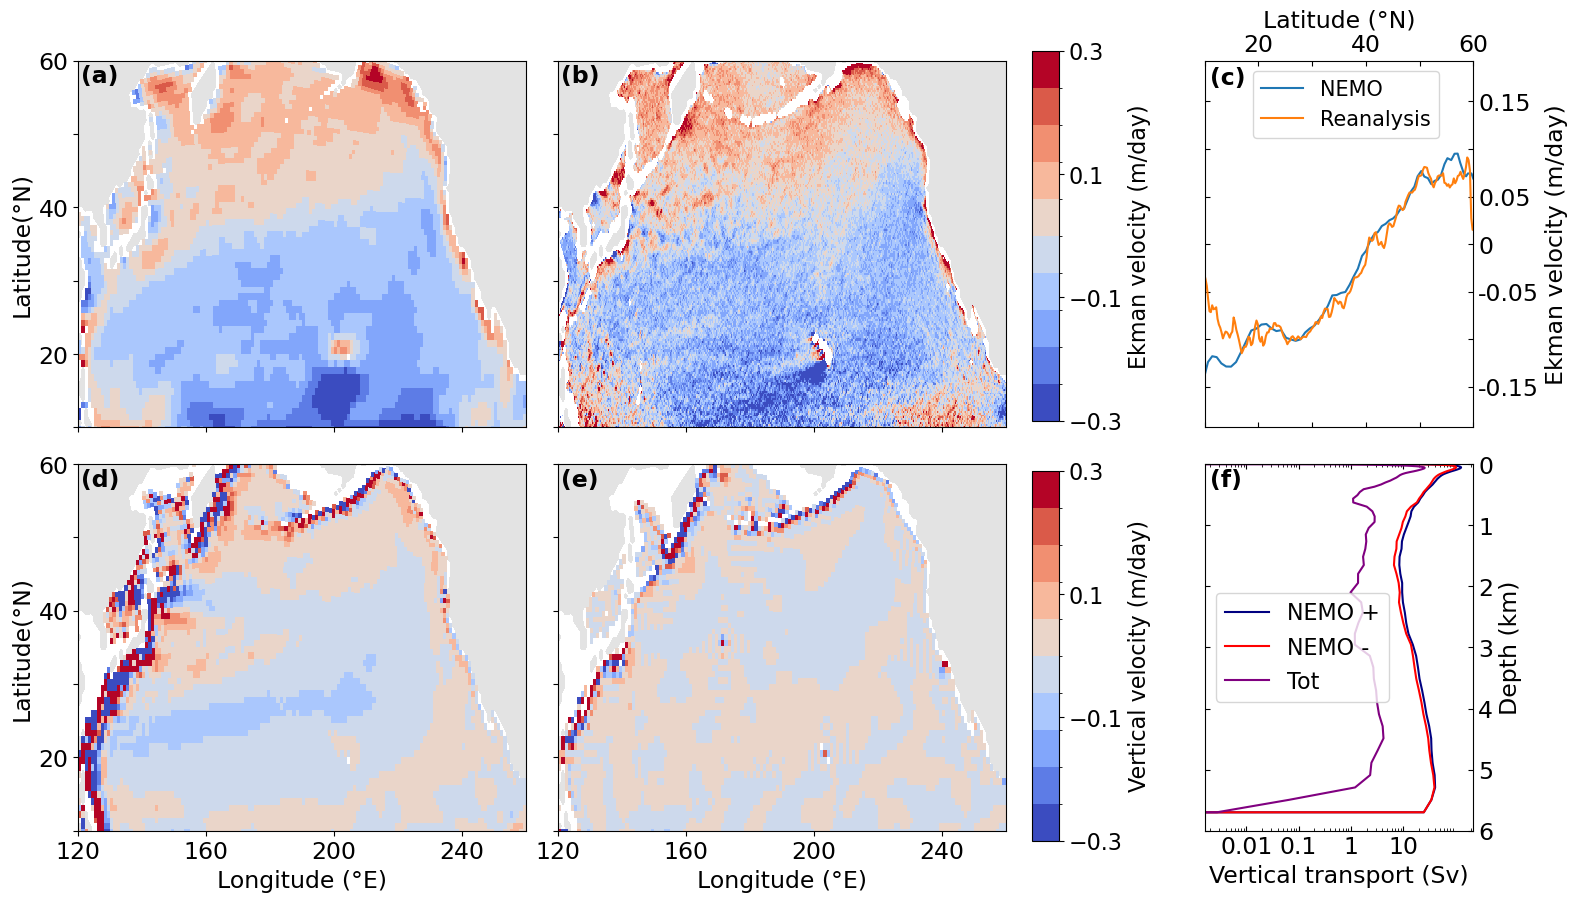

In [ ]:
fig = plt.figure(figsize=(18, 10)); gs = fig.add_gridspec(2, 4, wspace = 0.1, hspace = 0.1, width_ratios = [1, 1, 0.3, 0.6]); font = 17
norm_winds = uf.get_BoundNorm(vmin = -0.3, vmax = 0.3, cmapname = 'coolwarm')
southern_bound = 10

ax = fig.add_subplot(gs[0, 0])
ax.contourf(new_nav_lon, new_nav_lat, mask_continents, colors = ['white', 'gainsboro'], alpha = 0.8)
pco = ax.pcolormesh(new_nav_lon, new_nav_lat, velocities_nemo['integrated_Ekman_surface']/12, norm = norm_winds, cmap = 'coolwarm')
ax.set_xlim(120, 260); ax.set_ylim(southern_bound, 60)
ax.set_xticks([120 + 40 * i for i in range (4)]), ax.set_xticklabels([], fontsize = font)
ax.set_ylabel('Latitude(°N)', fontsize = font); ax.set_yticks([10 * i for i in range (1, 7)]), ax.set_yticklabels(['', '20', '', '40', '', '60'], fontsize = font)
ax.text(121, 57, '(a)', fontsize = font, fontweight = 'bold')

ax = fig.add_subplot(gs[0, 1])
# ax.contourf(l_lon_plot, l_lat_climato, mask_continents_climato, colors = ['white', 'gainsboro'], alpha = 0.8)
ax.contourf(new_nav_lon, new_nav_lat, mask_continents, colors = ['white', 'gainsboro'], alpha = 0.8)
ax.pcolormesh(l_lon_plot, l_lat_winds, np.where(mask_NP_winds_mS, np.nanmean(W_ekman_winds_daily, axis = 0), np.nan), 
              norm = norm_winds, cmap = 'coolwarm')
ax.set_xlim(120, 260); ax.set_ylim(southern_bound, 60)
ax.set_xticks([120 + 40 * i for i in range (4)]), ax.set_xticklabels([], fontsize = font)
ax.set_yticks([10 * i for i in range (1, 7)]), ax.set_yticklabels([], fontsize = font)
ax.text(121, 57, '(b)', fontsize = font, fontweight = 'bold')

ax = fig.add_subplot(gs[0, 3])
ax.plot(lats_avg[188:], velocities_nemo['zonal_Ekman_surface'][188:], label = 'NEMO')
ax.plot(l_lat_winds, np.nansum(np.where(mask_NP_winds, W_ekman_winds, np.nan) * area_clim, axis = (0, 2))*24*3600 / (24 * np.nansum(np.where(mask_NP_winds, area_clim, np.nan), axis = 1)), label = 'Reanalysis')
ax.set_xlim(southern_bound, 60); factor = 2 * 10**-6 * 24 *3600 + 0.02; ax.set_ylim(-factor, factor)
ax.set_xticks([10 * i for i in range(1, 7)]); ax.set_xticklabels(['', '20', '', '40', '', '60'], fontsize = font); ax.set_xlabel('Latitude (°N)', fontsize = font)
ax.set_yticks([-0.15 + 0.05 * i for i in range(7)]); ax.set_yticklabels([-0.15, '', -0.05, 0, 0.05, '', 0.15], fontsize = font); ax.set_ylabel('Ekman velocity (m/day)', fontsize = font)
ax.legend(loc = (0.18, 0.79), fontsize = font - 2); 
ax.xaxis.tick_top(); ax.xaxis.set_label_position('top'); 
ax.yaxis.tick_right(); ax.yaxis.set_label_position('right'); ax.tick_params(axis = 'both', which = 'both', bottom = True, left = True, direction = 'in')
ax.text(11, factor * 0.87, '(c)', fontsize = font, fontweight = 'bold')

uf.add_cbar(fig, pco, x = .655, y = 0.52, height = 0.37, label = 'Ekman velocity (m/day)', fontsize = font - 1, ticks = [-0.3 + 0.2 * i for i in range(4)])

depth1, depth2 = 300, 1000; idepth1, idepth2 = uf.approx_depth(depth1, l_depth)[1], uf.approx_depth(depth2, l_depth)[1]
range_values = 0.3; norm = uf.get_BoundNorm(-range_values, range_values)

ax = fig.add_subplot(gs[1, 0])
ax.contourf(new_nav_lon, new_nav_lat, mask_continents, colors = ['white', 'gainsboro'], alpha = 0.8)
pco = ax.pcolormesh(new_nav_lon, new_nav_lat, velocities_nemo['w_velocity_300m'], norm = norm, cmap = 'coolwarm')
ax.set_xlim(120, 260); ax.set_ylim(southern_bound, 60)
ax.set_xlabel('Longitude (°E)', fontsize = font); ax.set_xticks([120 + 40 * i for i in range (4)]), ax.set_xticklabels([120 + 40 * i for i in range (4)], fontsize = font)
ax.set_ylabel('Latitude(°N)', fontsize = font); ax.set_yticks([10 * i for i in range (1, 7)]), ax.set_yticklabels(['', '20', '', '40', '', '60'], fontsize = font)
ax.text(121, 57, '(d)', fontsize = font, fontweight = 'bold')

ax = fig.add_subplot(gs[1, 1])
ax.contourf(new_nav_lon, new_nav_lat, mask_continents, colors = ['white', 'gainsboro'], alpha = 0.8)
pco = ax.pcolormesh(new_nav_lon, new_nav_lat, velocities_nemo['w_velocity_1045m'], norm = norm, cmap = 'coolwarm')
ax.set_xlabel('Longitude (°E)', fontsize = font); ax.set_xticks([120 + 40 * i for i in range (4)]), ax.set_xticklabels([120 + 40 * i for i in range (4)], fontsize = font)
ax.set_yticks([10 * i for i in range (1, 7)]), ax.set_yticklabels([], fontsize = font)
ax.text(121, 57, '(e)', fontsize = font, fontweight = 'bold')

ax.set_xlim(120, 260); ax.set_ylim(southern_bound, 60)
uf.add_cbar(fig, pco, y = 0.1, height = 0.37, x = .655, label = 'Vertical velocity (m/day)', fontsize = font - 1, ticks = [-0.3 + 0.2 * i for i in range(4)])


ax = fig.add_subplot(gs[1, 3])
ax.plot(velocities_nemo['integrated_velocity_pos_NP'], l_depth, label = 'NEMO +', color = 'navy')
ax.plot(velocities_nemo['integrated_velocity_neg_NP'], l_depth, label = 'NEMO -', color = 'red')
ax.plot(velocities_nemo['integrated_velocity_NP'], l_depth, label = 'Tot', color = 'purple')
ax.set_ylim(6000, 0); ax.set_ylabel('Depth (km)', fontsize = font); ax.set_yticks([1000* i for i in range(7)]); ax.set_yticklabels([i for i in range(7)], fontsize = font)
ax.yaxis.tick_right(); ax.yaxis.set_label_position('right'); ax.tick_params(axis = 'both', which = 'both', top = True, left = True, direction = 'in')
ax.set_xscale('log'); ax.set_xlabel('Vertical transport (Sv)', fontsize = font); ax.set_xticks([10**(4+i) for i in range(4)]); ax.set_xticklabels([0.01, 0.1, 1, 10], fontsize = font)
ax.legend(fontsize = font - 1)
ax.text(2000, 360, '(f)', fontsize = font, fontweight = 'bold')


plt.savefig(fig_path + 'lack_upwelling_NP_300_1000m_monthly.png', bbox_inches = 'tight')